<a href="https://colab.research.google.com/github/IsauraRs/AzureNeuralNetworks/blob/master/AzureIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a las redes neuronales

Cada entrada tiene un peso asociado, el cual le asigna relevancia a las señales de entrada. 

Se multiplica el valor de entrada por el peso asociado (x_1 * w_1, ..., x_j * w_j) y luego se suman los resultados (unión sumadora).

La salida es una función de activación, la cual determina si se manda o no un pulso, 1 si la suma de los productos es mayor a cierto umbral, o 0 si la suma es menor o igual al umbral. 

Un perceptrón es un tipo de neurona artificial adaptada a código, es una unidad de procesamiento que toma entradas y produce una salida, cada entrada tiene un peso asociado y se suman estos productos, si la suma es mayor o igual a un umbral, la salida será 1, de lo contrario será 0.

In [ ]:
import numpy as np

Primero se crea una clase llamada perceptrón, tendrá un constructor que tendrá pesos y entradas.

Las entradas y pesos que se pasen al constructor las guardará como valor propio.

A la función de decisión se le pasa un umbral.


In [ ]:
class Perceptron():

  def __init__(self, inputs, weights):

    self.inputs = np.array(inputs)
    self.weights = np.array(weights)

  def decide(self, treshold):

    return (self.inputs @ self.weights) >= treshold

La unión sumadora es un producto punto, el cual realiza el operador @

In [ ]:
inputs, weights = [] , []

preguntas = [
    ". ¿Cuál es la velocidad? ",   #2       
    ". ¿Ritmo cardiaco ",          #1, 2, 3
    ". ¿Respiración? "             #1, 2, 3   #Estos son niveles 
]

for pregunta in preguntas:

  i = int(input(pregunta))
  w = int(input(". Y su peso asociado es... "))

  inputs.append(i)
  weights.append(w)
  print()

treshold = int(input(". Y el umbral o límite será: "))


. ¿Cuál es la velocidad? 1
. Y su peso asociado es... 1

. ¿Ritmo cardiaco 1
. Y su peso asociado es... 1

. ¿Respiración? 1
. Y su peso asociado es... 1

. Y el umbral o límite será: 4


Se llaman las funciones

In [ ]:
p = Perceptron(inputs, weights) #Para iniciar el perceptrón
p.decide(treshold)              #Para comparar el umbral de decisión

True

Por lo tanto, el producto punto es mayor o igual al umbral.

Si se despeja el umbral, se suma o resta el umbral (bias -> sesgo), entonces, si se tiene el vector de entradas, se compara con 0. La función ahora está centrada en el 0 y la comparación es si es positivo o negativo. Es una función discontinua.

La neurona puede ser más suceptible con una función sigmoidal, es una función continua suave, las entradas pueden ser valores en todos los números reales y da valores entre 0 y 1.

# Programando una neurona sigmoide

La función de activación recibe los datos y da una salida.

El inicio es igual, pero la función de decisión cambia, toma el producto interior y le suma el bias, la variable z almacena esto para después utilizarlo en la función de activación sigmoide.



In [ ]:
class SigmoidNeuron():

  def __init__(self, inputs, weights):

    self.inputs = np.array(inputs)
    self.weights = np.array(weights)

  def decide(self, bias):

    z = (self.weights @ self.inputs) + bias

    return 1. / (1. + np.exp(-z))
      

In [ ]:
bias = int(input(". El nuevo bias será: "))

s = SigmoidNeuron(inputs, weights)  #Se llama a la función
s.decide(bias)


. El nuevo bias será: -4


0.2689414213699951

Por ejemplo, si una persona está corriendo, el valor es 1 y de otro modo está caminando, la nueva neurona dice la probabilidad de que esté haciendo una u otra cosa.

Esta neurona será la que se utilizará.

# Redes neuronales

Son unidades de procesamiento, son neuronas artificiales estructuradas en capas, de las cuales hay tres tipos principales:

*  Capas de entrada: son las capas de información que va a entrar a la red neuronal.

*  Capa oculta: se pueden tener muchas capas ocultas, las cuales realizan el procesamiento con los datos de entrada, tienen una unión sumadora y una función de salida.

* Capa de salida: regresa el valor final.

En una red, se multiplican las entradas por una matriz de pesos.




Se crea un  objeto para crear redes neuronales.

Suponiendo que la capa de entrada será siempre de dos neuronas y la capa de salida de una, con el fin de visualizar el funcionamiento interno de la red como un mapeo $\mathbb{R}^2 \to \mathbb{R}$.

La función uniform parte de la distribución uniforme, da un número aleatorio entre 0 y 1.

In [ ]:
from numpy.random import uniform as u
import numpy as np

class NeuralNet:

  #Se crea el constructor de la clase, que tomará como parámetros
  #el número de capas ocultas y el número de neuronas por capa oculta.
  def __init__(self, n_layers=1, n_neurons=4):

    #Se definen pesos y bias en la capa de entrada
    self.w_in = u(-1, 1, (2, n_neurons))
    self.b_in = u(-1, 1, n_neurons)

    #Se definen pesos y bias en capas ocultas
    self.w_hidden = u(-3, 3, (n_layers, n_neurons, n_neurons))
    self.b_hidden = u(-1, 1, (n_layers, n_neurons)) #bias

    #Se definen pesos y bias en las capas de salida
    self.w_out = u(-1, 1, (n_neurons, 1)) #número de neuronas de la última capa a 1 
    self.b_out = u(-1, 1, 1)

  #vector de entrada, matriz de pesos y matriz de bias

  @staticmethod
  def activate_layer(y_in, w, b):
    #z = np.dot(y_in, w) + b
    #s = 1. / (1. + np.exp(-z))

     z = np.dot(y_in, w) + b # TODO y_in · w + b
     s = 1. / (1. + np.exp(-z))
     
     return s 


    # Esto funciona para una sola capa. La salida de una capa es el vector
    #De entrada de la siguiente capa.

  def feedforward(self, y_in):

    y = self.activate_layer(y_in, self.w_in, self.b_in) #Se activa la capa de entrada para pasar a la siguiente
    #Activa cada capa
    for i in range(self.w_hidden.shape[0]):

      y = self.activate_layer(y, self.w_hidden[i], self.b_hidden[i])

    output = self.activate_layer(y, self.w_out, self.b_out)

    return output

  
  #Para visualizar el mapeo de la red neuronal en un plano 2D
  def visualize(self, grid_size = 50, colormap = 'viridis', c_reverse = False):

    import matplotlib.pyplot as plt
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = 300

    #Toma una rejilla de valores de -0.5 a 0.5, toma pares y los mete a la red
    x = np.linspace(-0.5, 0.5, grid_size)
    y = np.linspace(-0.5, 0.5, grid_size)
    xx, yy = np.meshgrid(x,y)

    #Se hace una lista pra los puntos(x,y) (coordenadas) en la  rejilla
    x_flat = xx.flatten()
    y_flat = yy.flatten()
    y_in = zip(x_flat, y_flat)
    y_in = np.array(list(y_in))

    #Se hace feedforward con la red
    y_out = self.feedforward(y_in)

    #Se redimensiona la rejilla
    y_out_2d = np.reshape(y_out, (grid_size, grid_size))

    if c_reverse:

      cmap = plt.cm.get_cmap(colormap)
      cmap = cmap.reversed()

    else:

      cmap = colormap

    #Se grafican los resultados de la red
    plt.figure(figsize = (10, 10))
    plt.axes([0, 0, 1, 1])
    plt.imshow(
        y_out_2d,
        extent = [-0.5, 0.5, -0.5, 0.5],
        interpolation = 'nearest',
        cmap = cmap
    )
    plt.axis(False)
    plt.show()

Definiendo valores de entrada

In [ ]:
y_in = np.array([0.8, 0.2])

In [ ]:
nn = NeuralNet()

In [ ]:
nn.w_in

array([[ 0.67764469, -0.69483863,  0.27240415, -0.48836901],
       [-0.13892703,  0.37042454,  0.38031936, -0.66794835]])

In [ ]:
nn.b_in

array([ 0.39531805,  0.88365468, -0.81609629, -0.26061171])

In [ ]:
nn.w_hidden[0]

array([[-2.27164571, -0.36391047, -0.2795695 ,  1.24289239],
       [-1.05042271, -0.14809363,  2.76826885, -0.82139745],
       [ 2.99355962,  0.06711291,  1.59476671,  2.48912082],
       [-2.74401844, -0.88878382,  1.91256219, -0.57777861]])

Se realiza el feedforward de la red con el valor de entrada.

In [ ]:
nn.feedforward(y_in)

array([0.46616693])

Visualización

Muestra un mapa de relación entre los valores

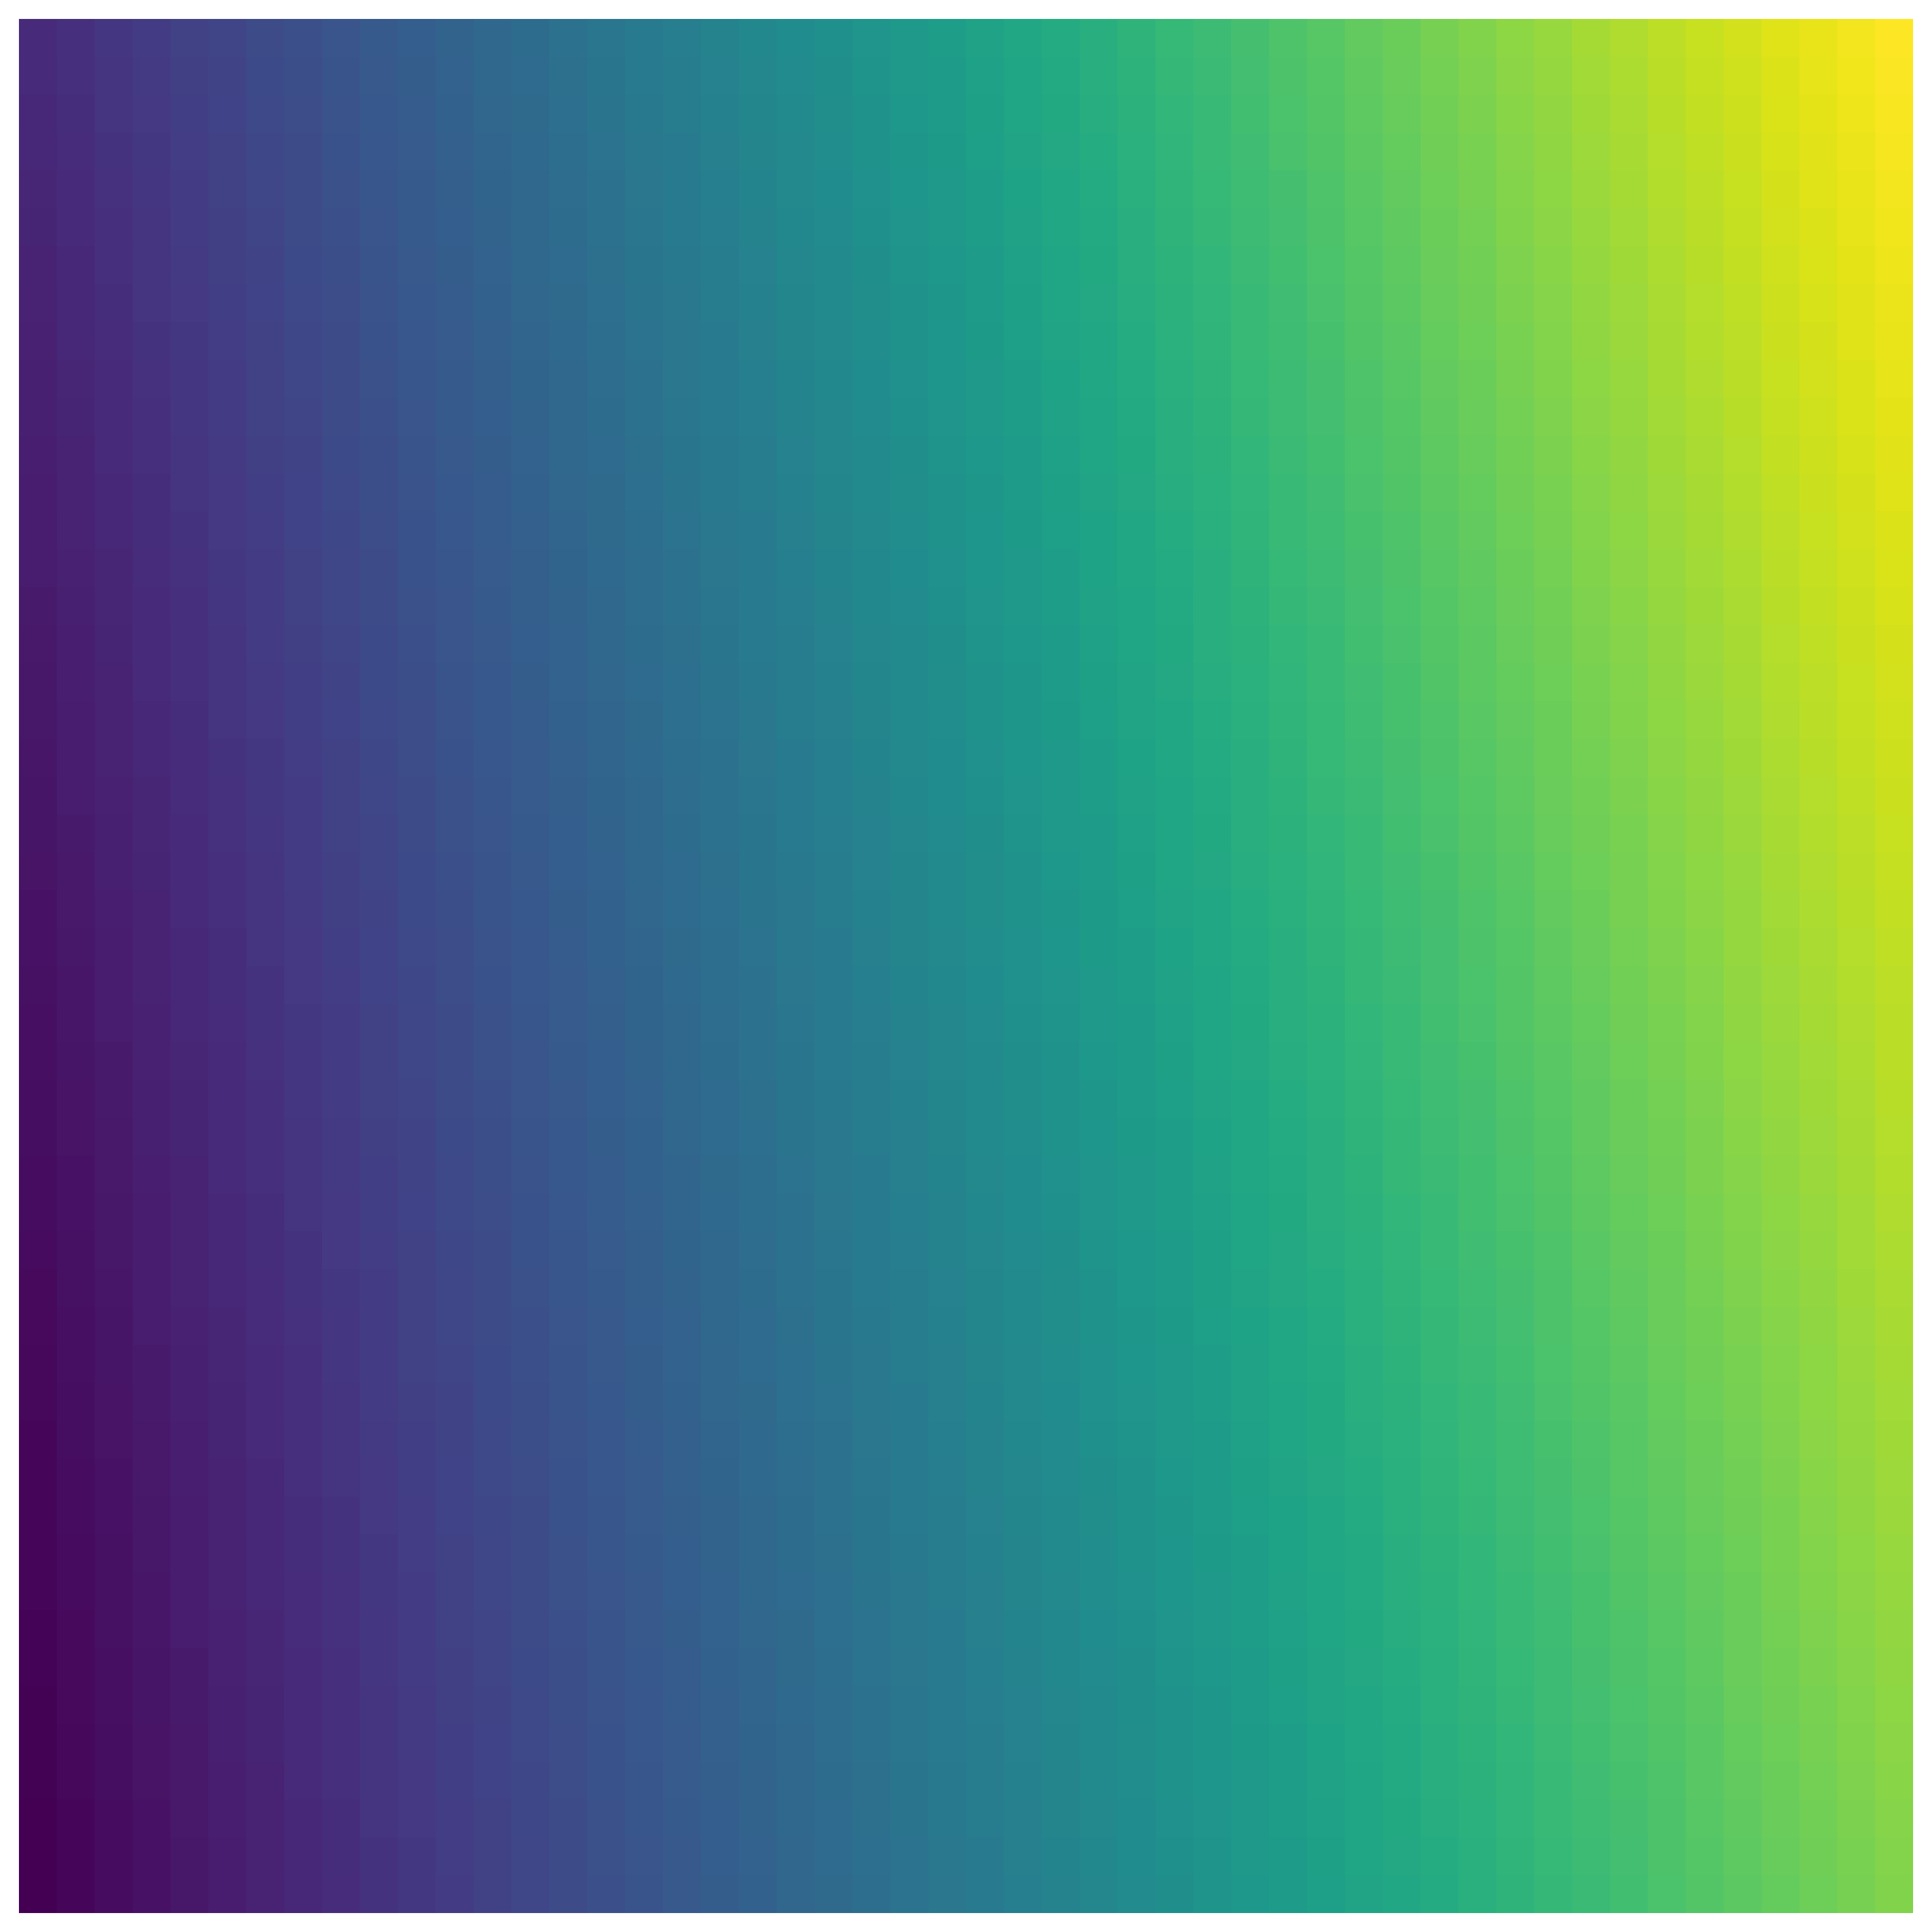

In [ ]:
nn.visualize()

Creando una nueva red con 20 capas con 100 neuronas

In [ ]:
deep_nn = NeuralNet(n_layers=20, n_neurons=100)

In [ ]:
deep_nn.w_hidden[0]

array([[ 2.63682368, -2.00301255,  0.31358608, ..., -0.09507488,
         2.92412452,  2.11666996],
       [ 0.45833206, -1.67159217, -2.28438117, ...,  1.55134388,
        -0.58992405, -2.24508889],
       [-2.59416607,  1.7487845 ,  0.41922659, ...,  0.48334641,
        -2.27740263, -0.55994252],
       ...,
       [ 2.11239745, -1.65372552, -1.05149666, ..., -1.77409256,
         0.36779721, -0.59685168],
       [ 0.28636787,  0.82845082, -0.23123566, ...,  2.60669681,
        -1.51612204,  2.19752589],
       [ 1.93478895, -2.6683625 , -0.69449655, ..., -1.57048282,
        -1.80716239,  2.56614783]])

In [ ]:
deep_nn.feedforward(y_in)

array([0.01386615])

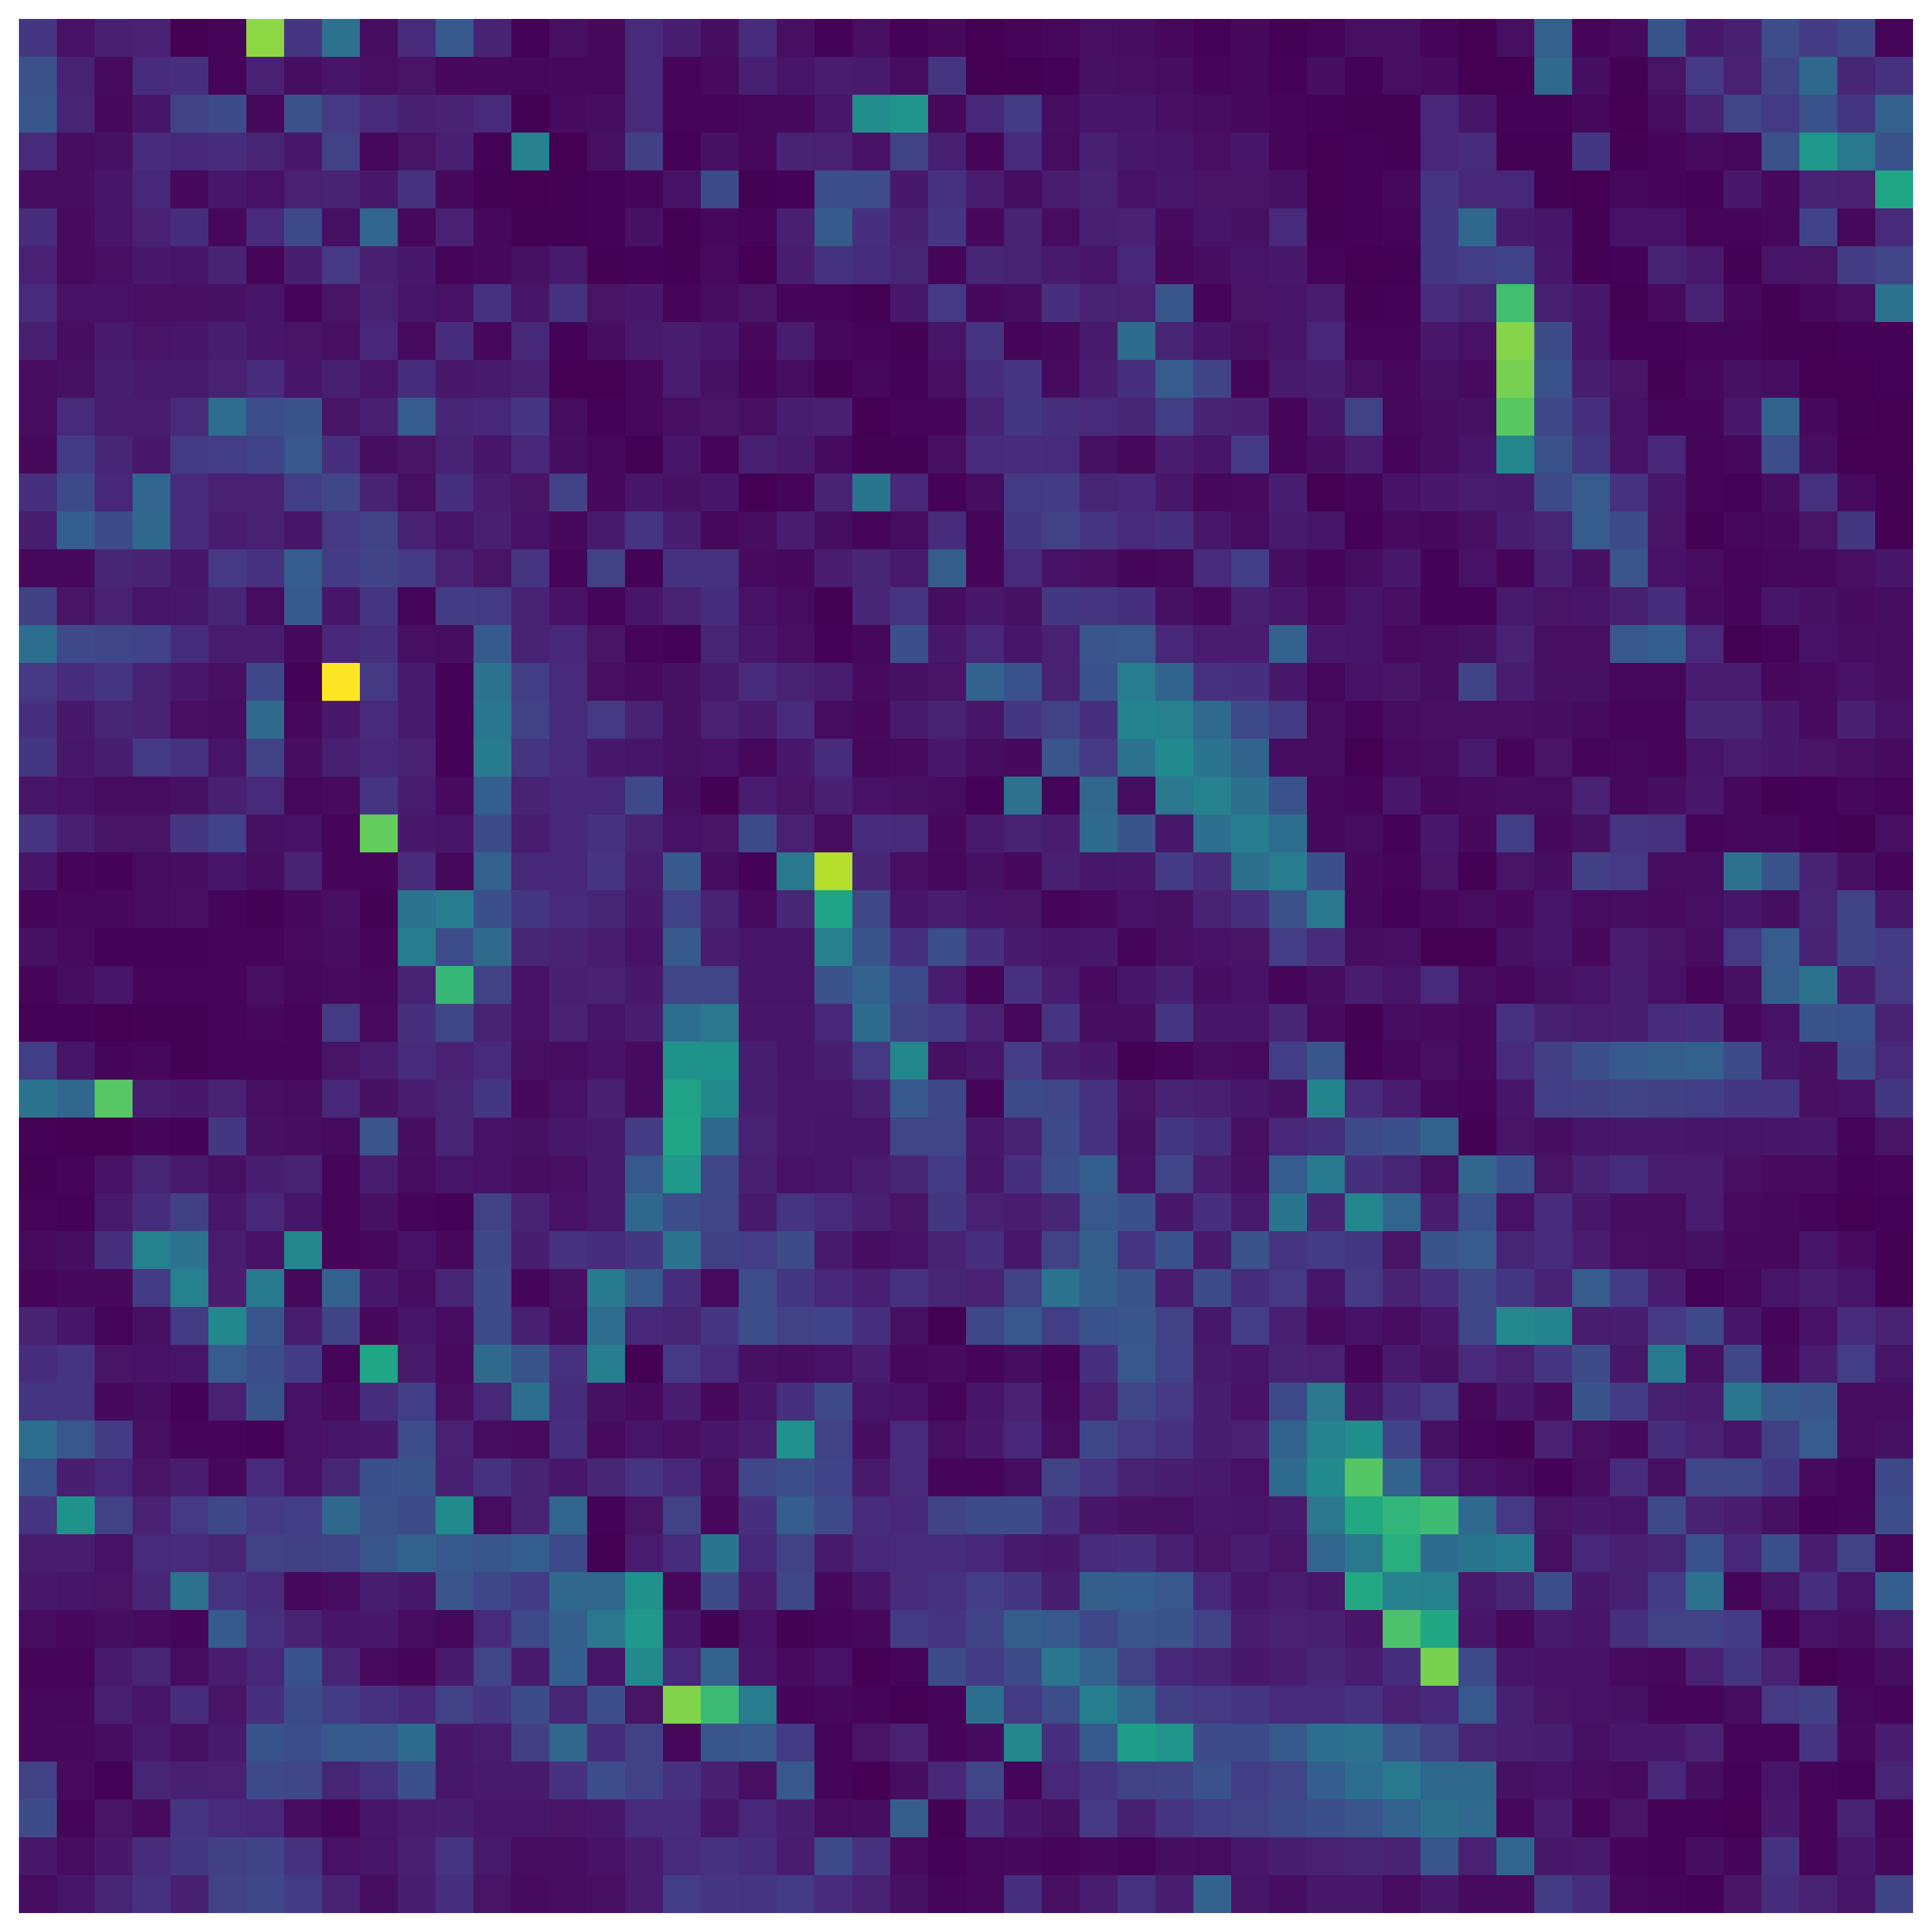

In [ ]:
deep_nn.visualize()

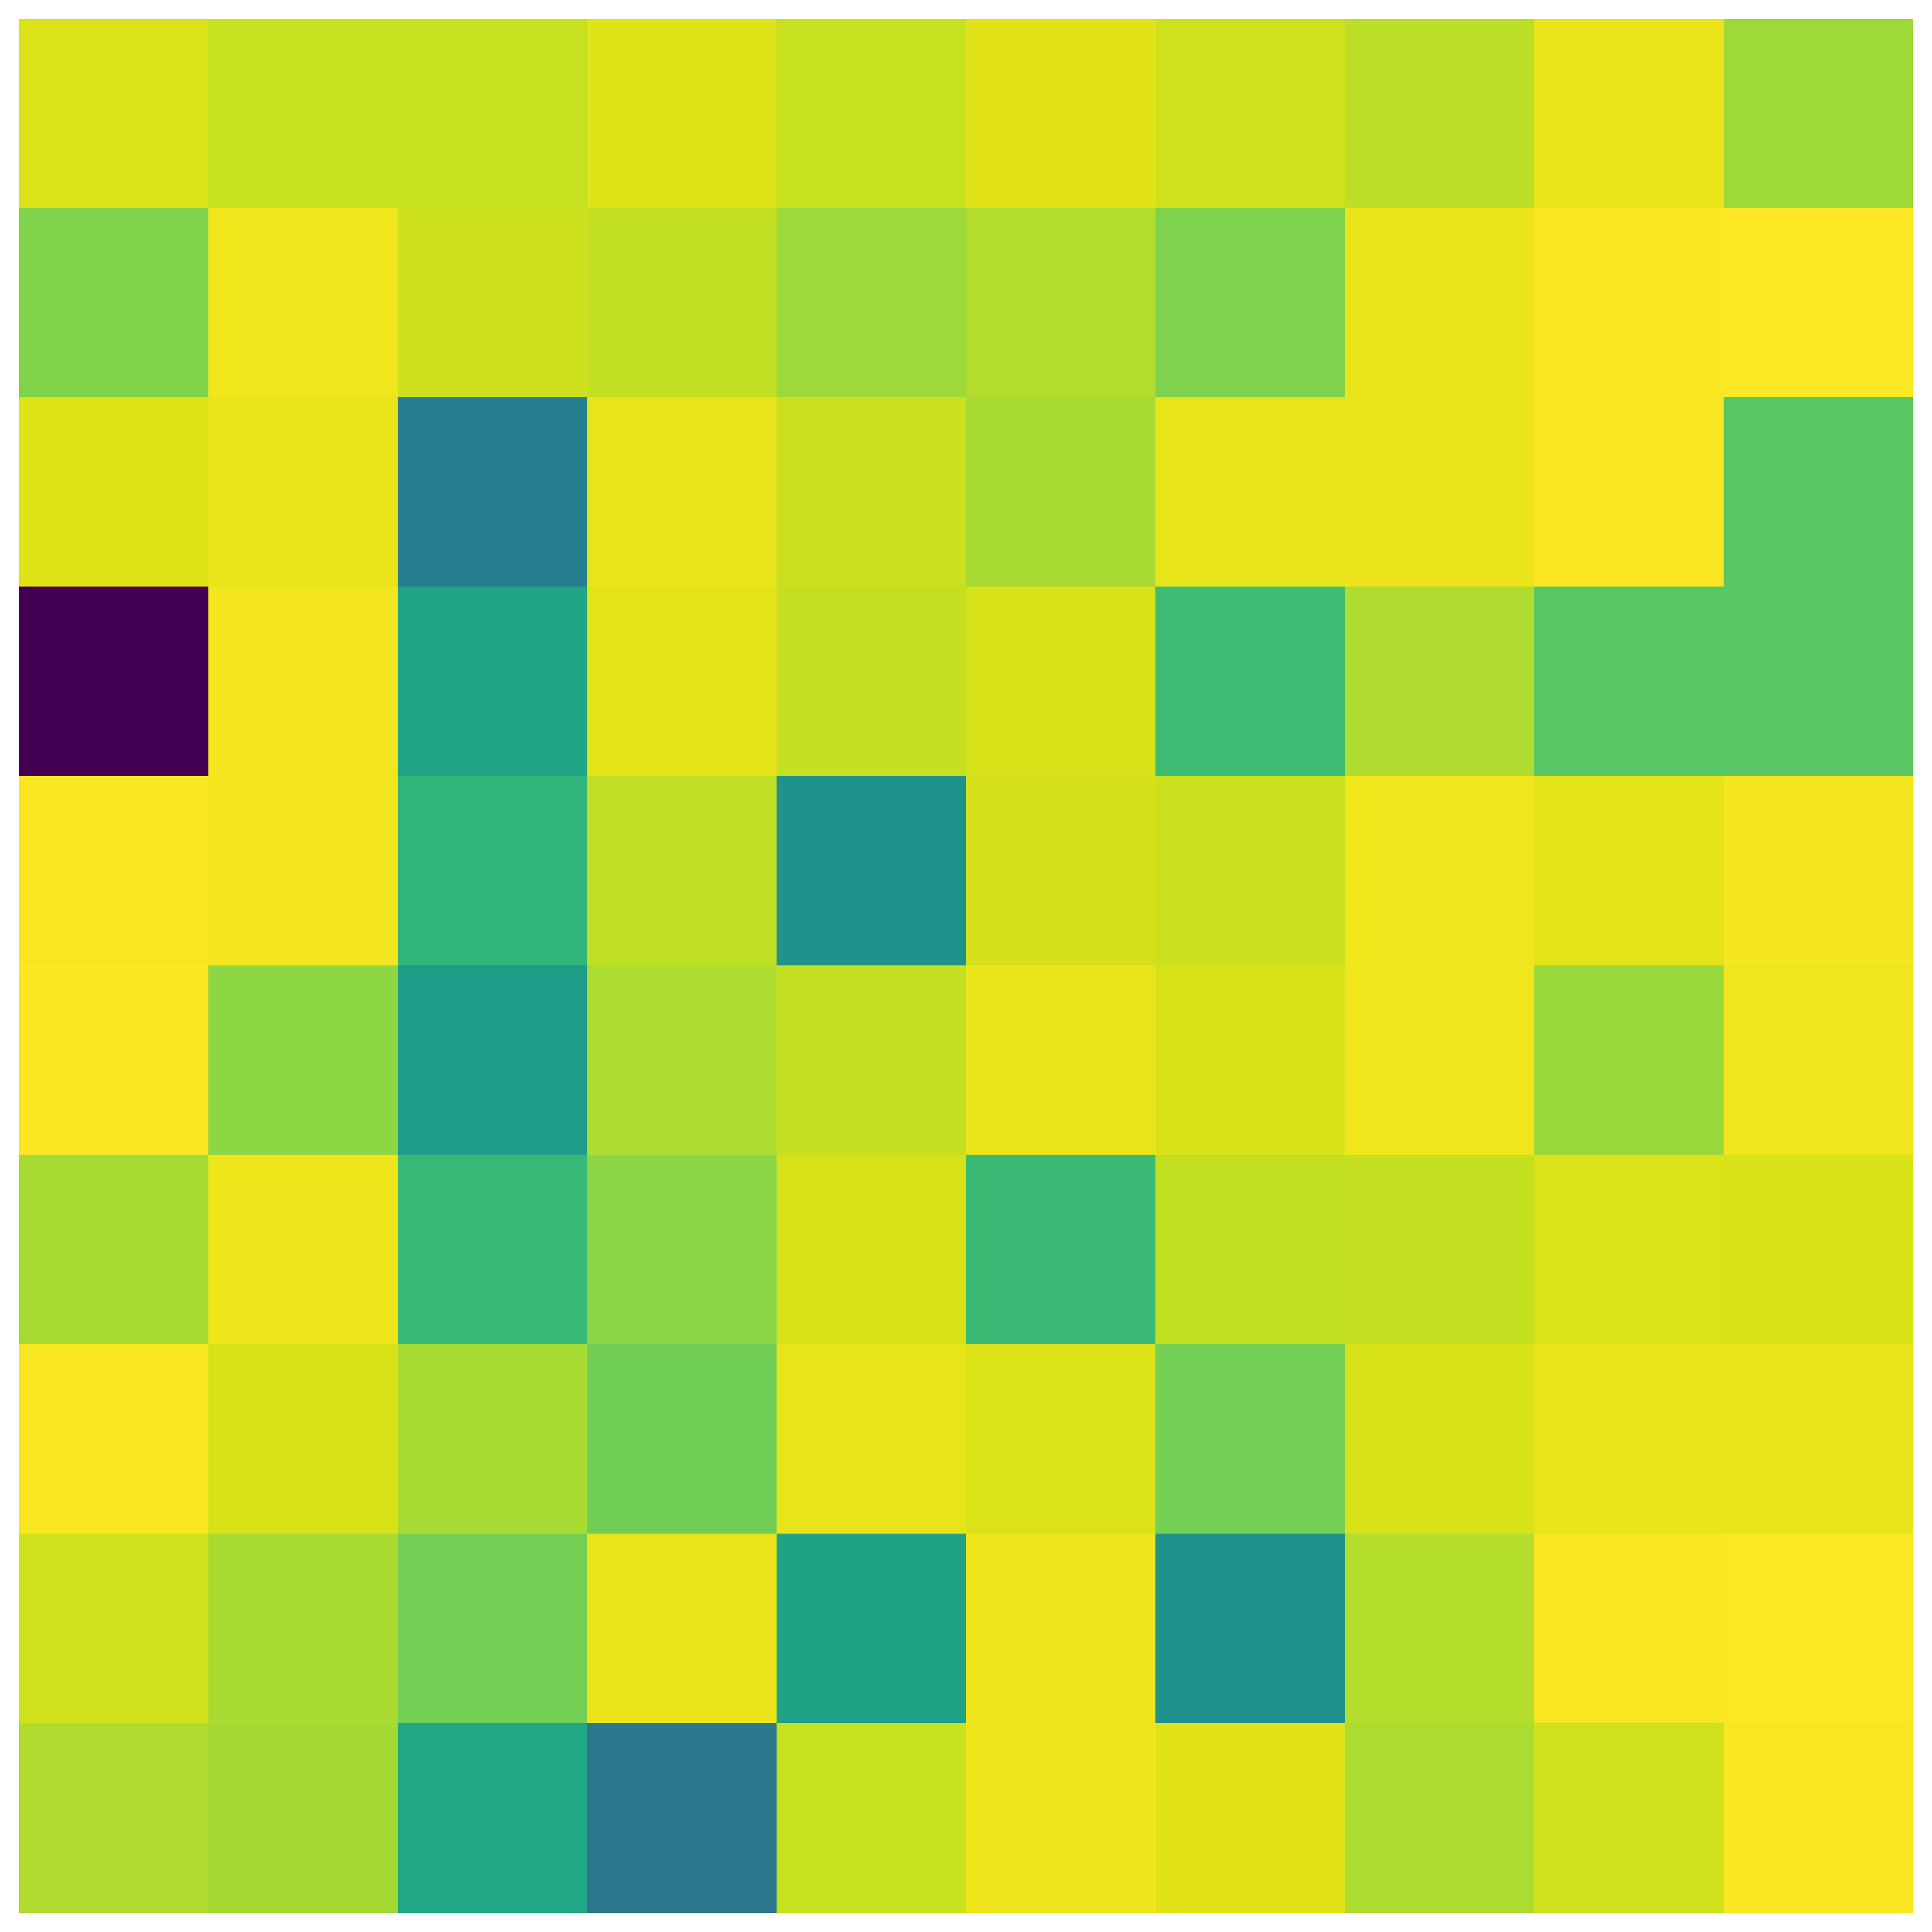

In [ ]:
deep_nn.visualize(grid_size=10)

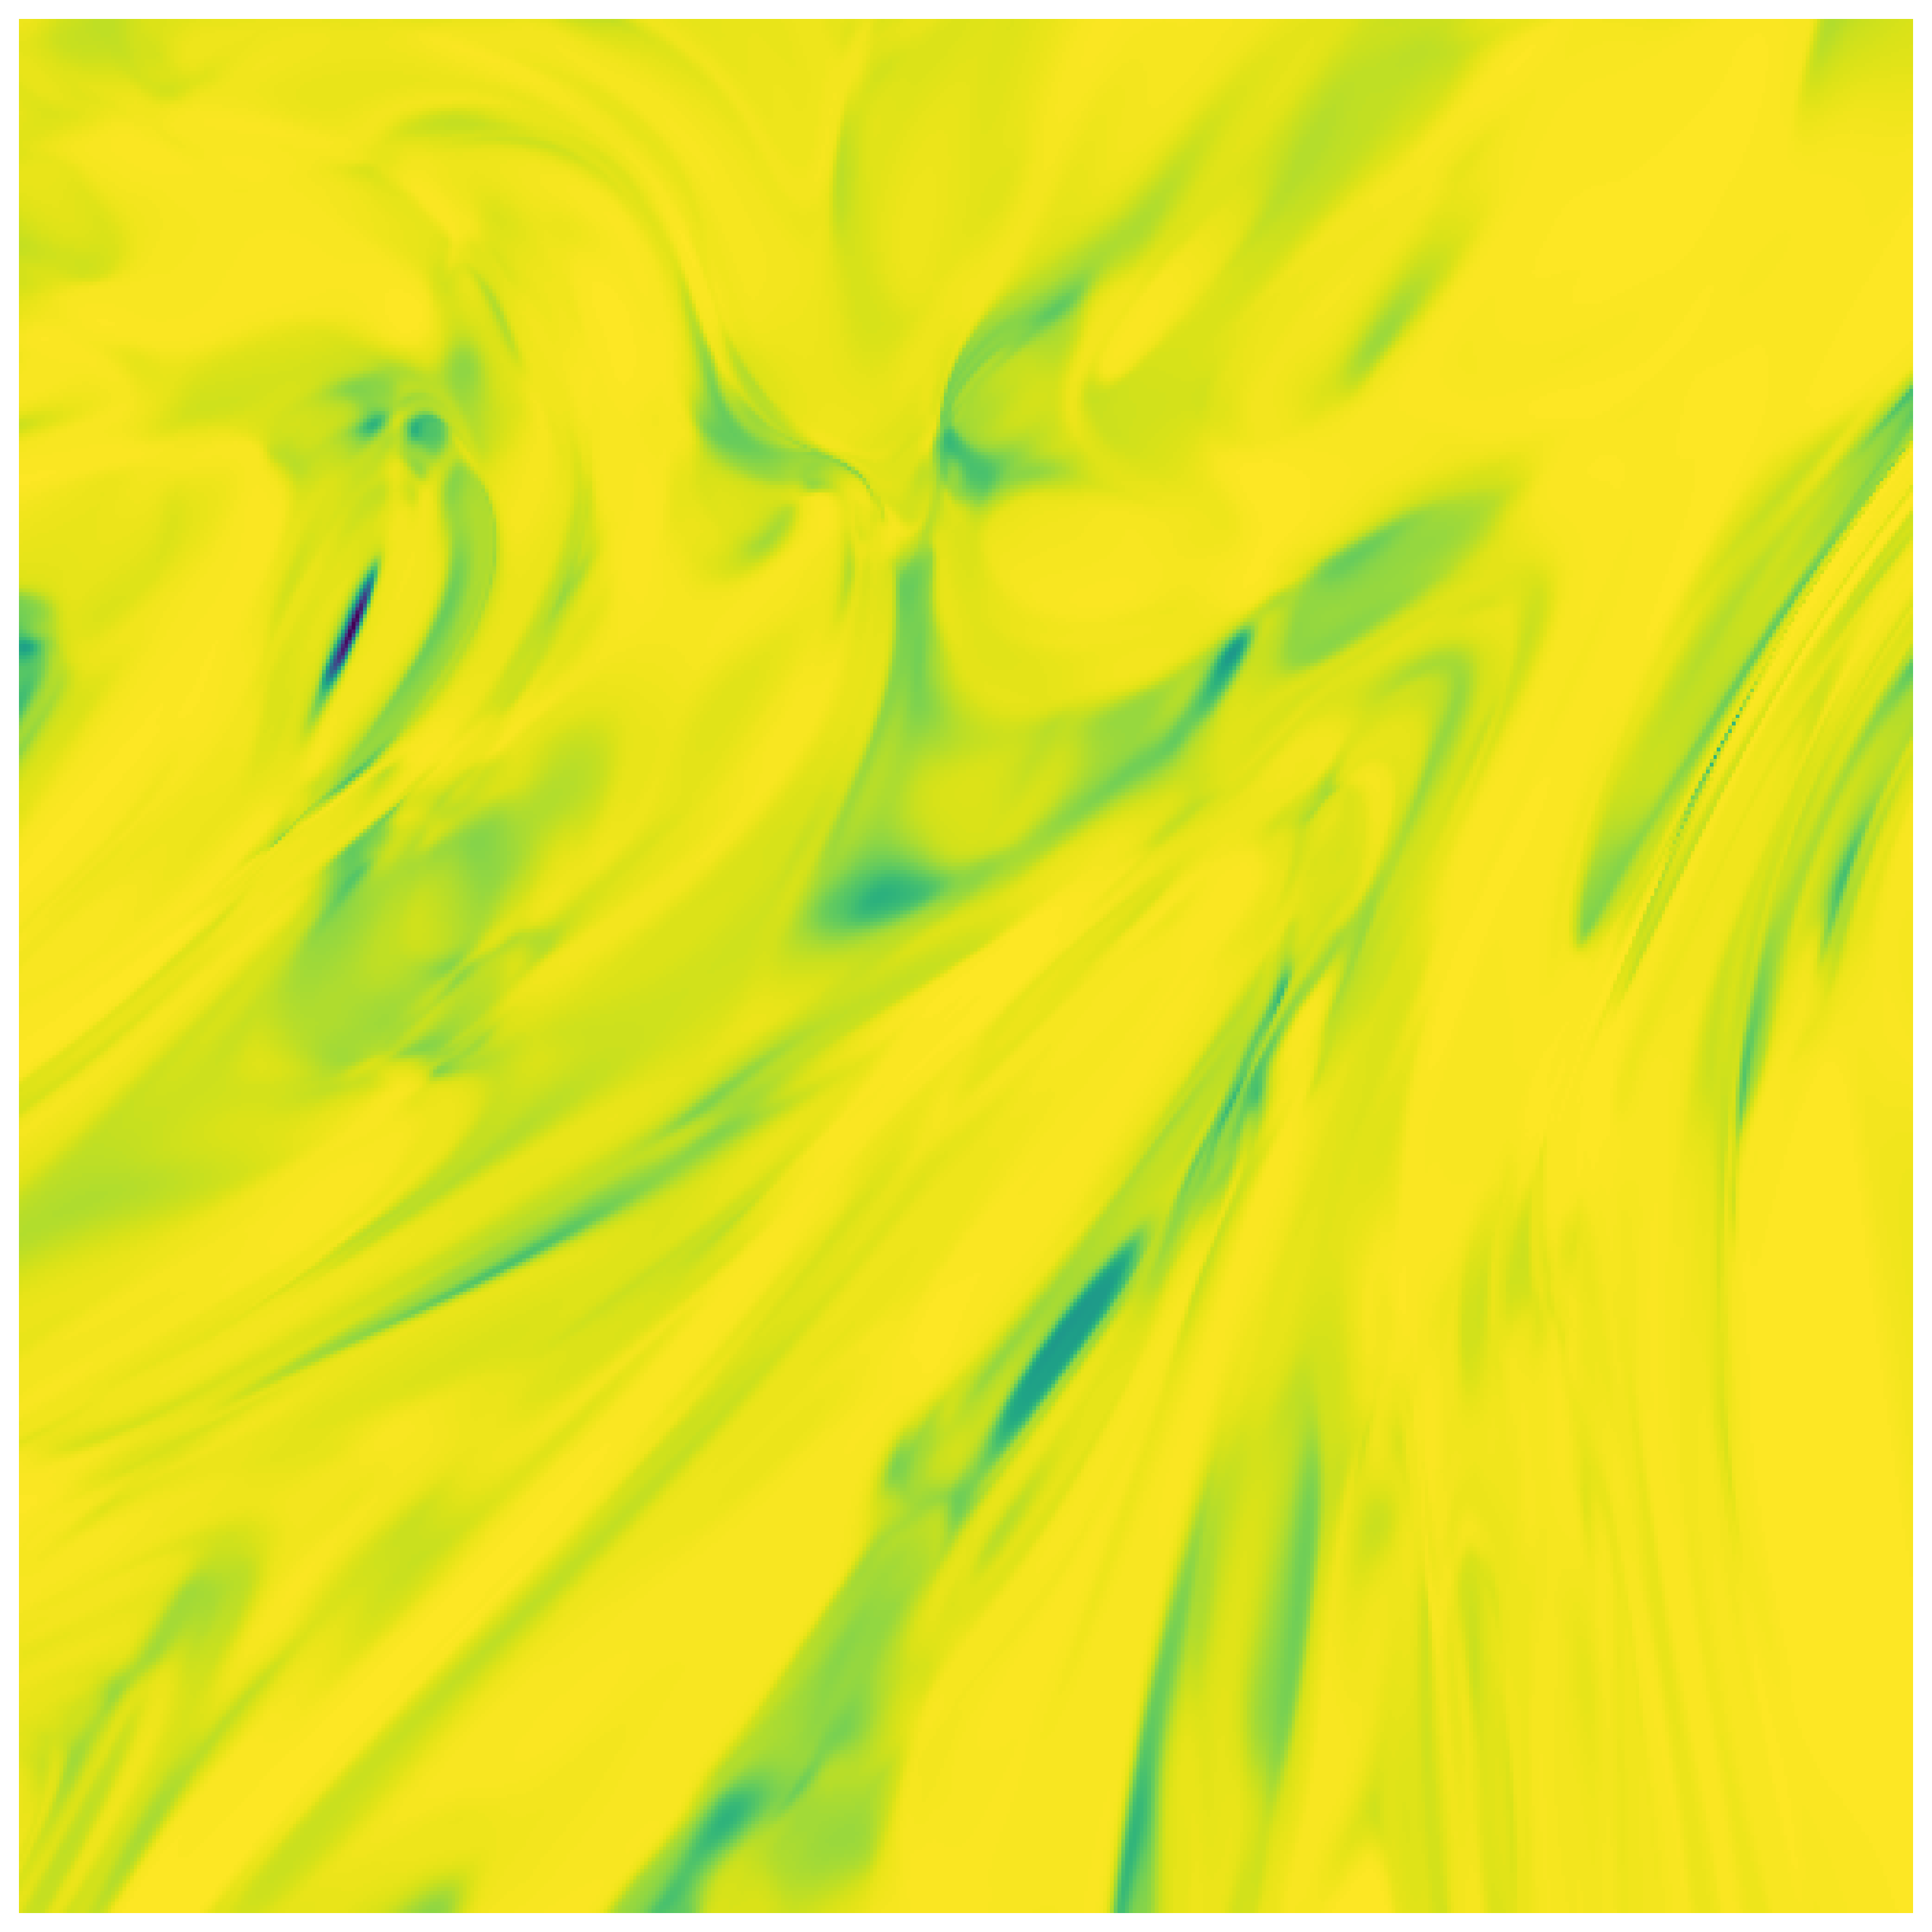

In [ ]:
deep_nn.visualize(grid_size=512)

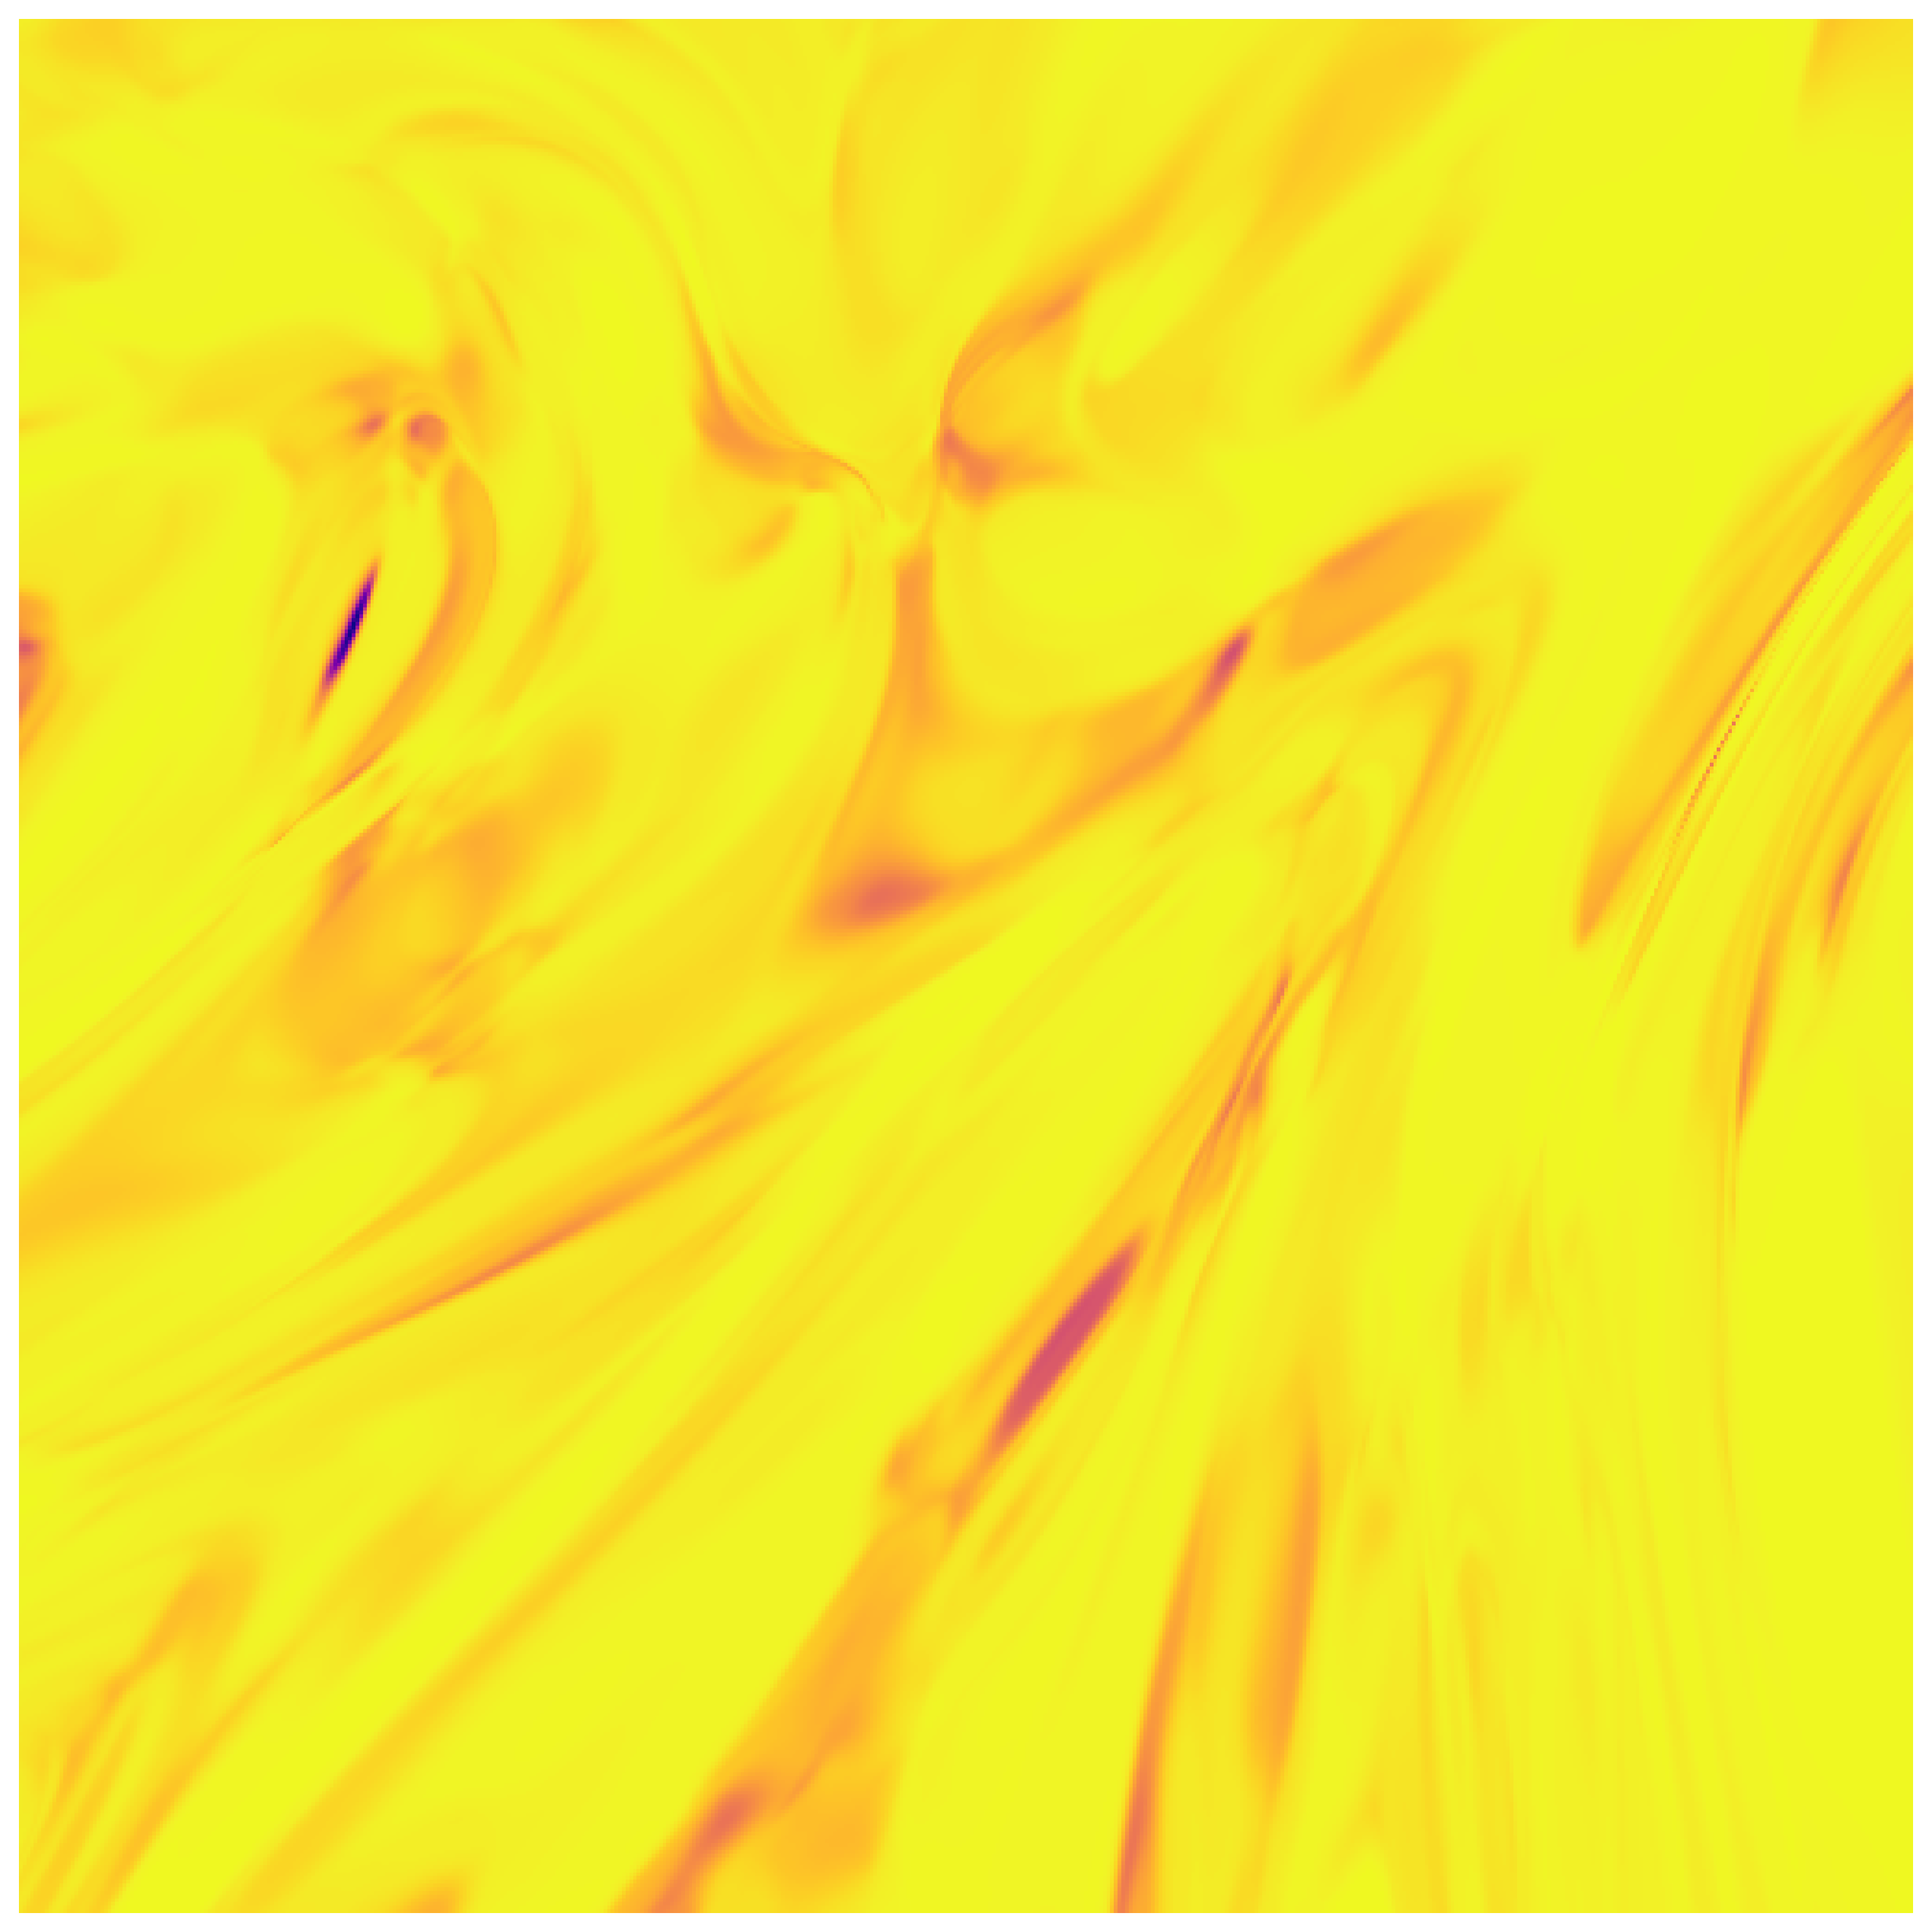

In [ ]:
deep_nn.visualize(grid_size=512, colormap='plasma')

In [ ]:
deep_nn = NeuralNet(n_layers=20, n_neurons=100)

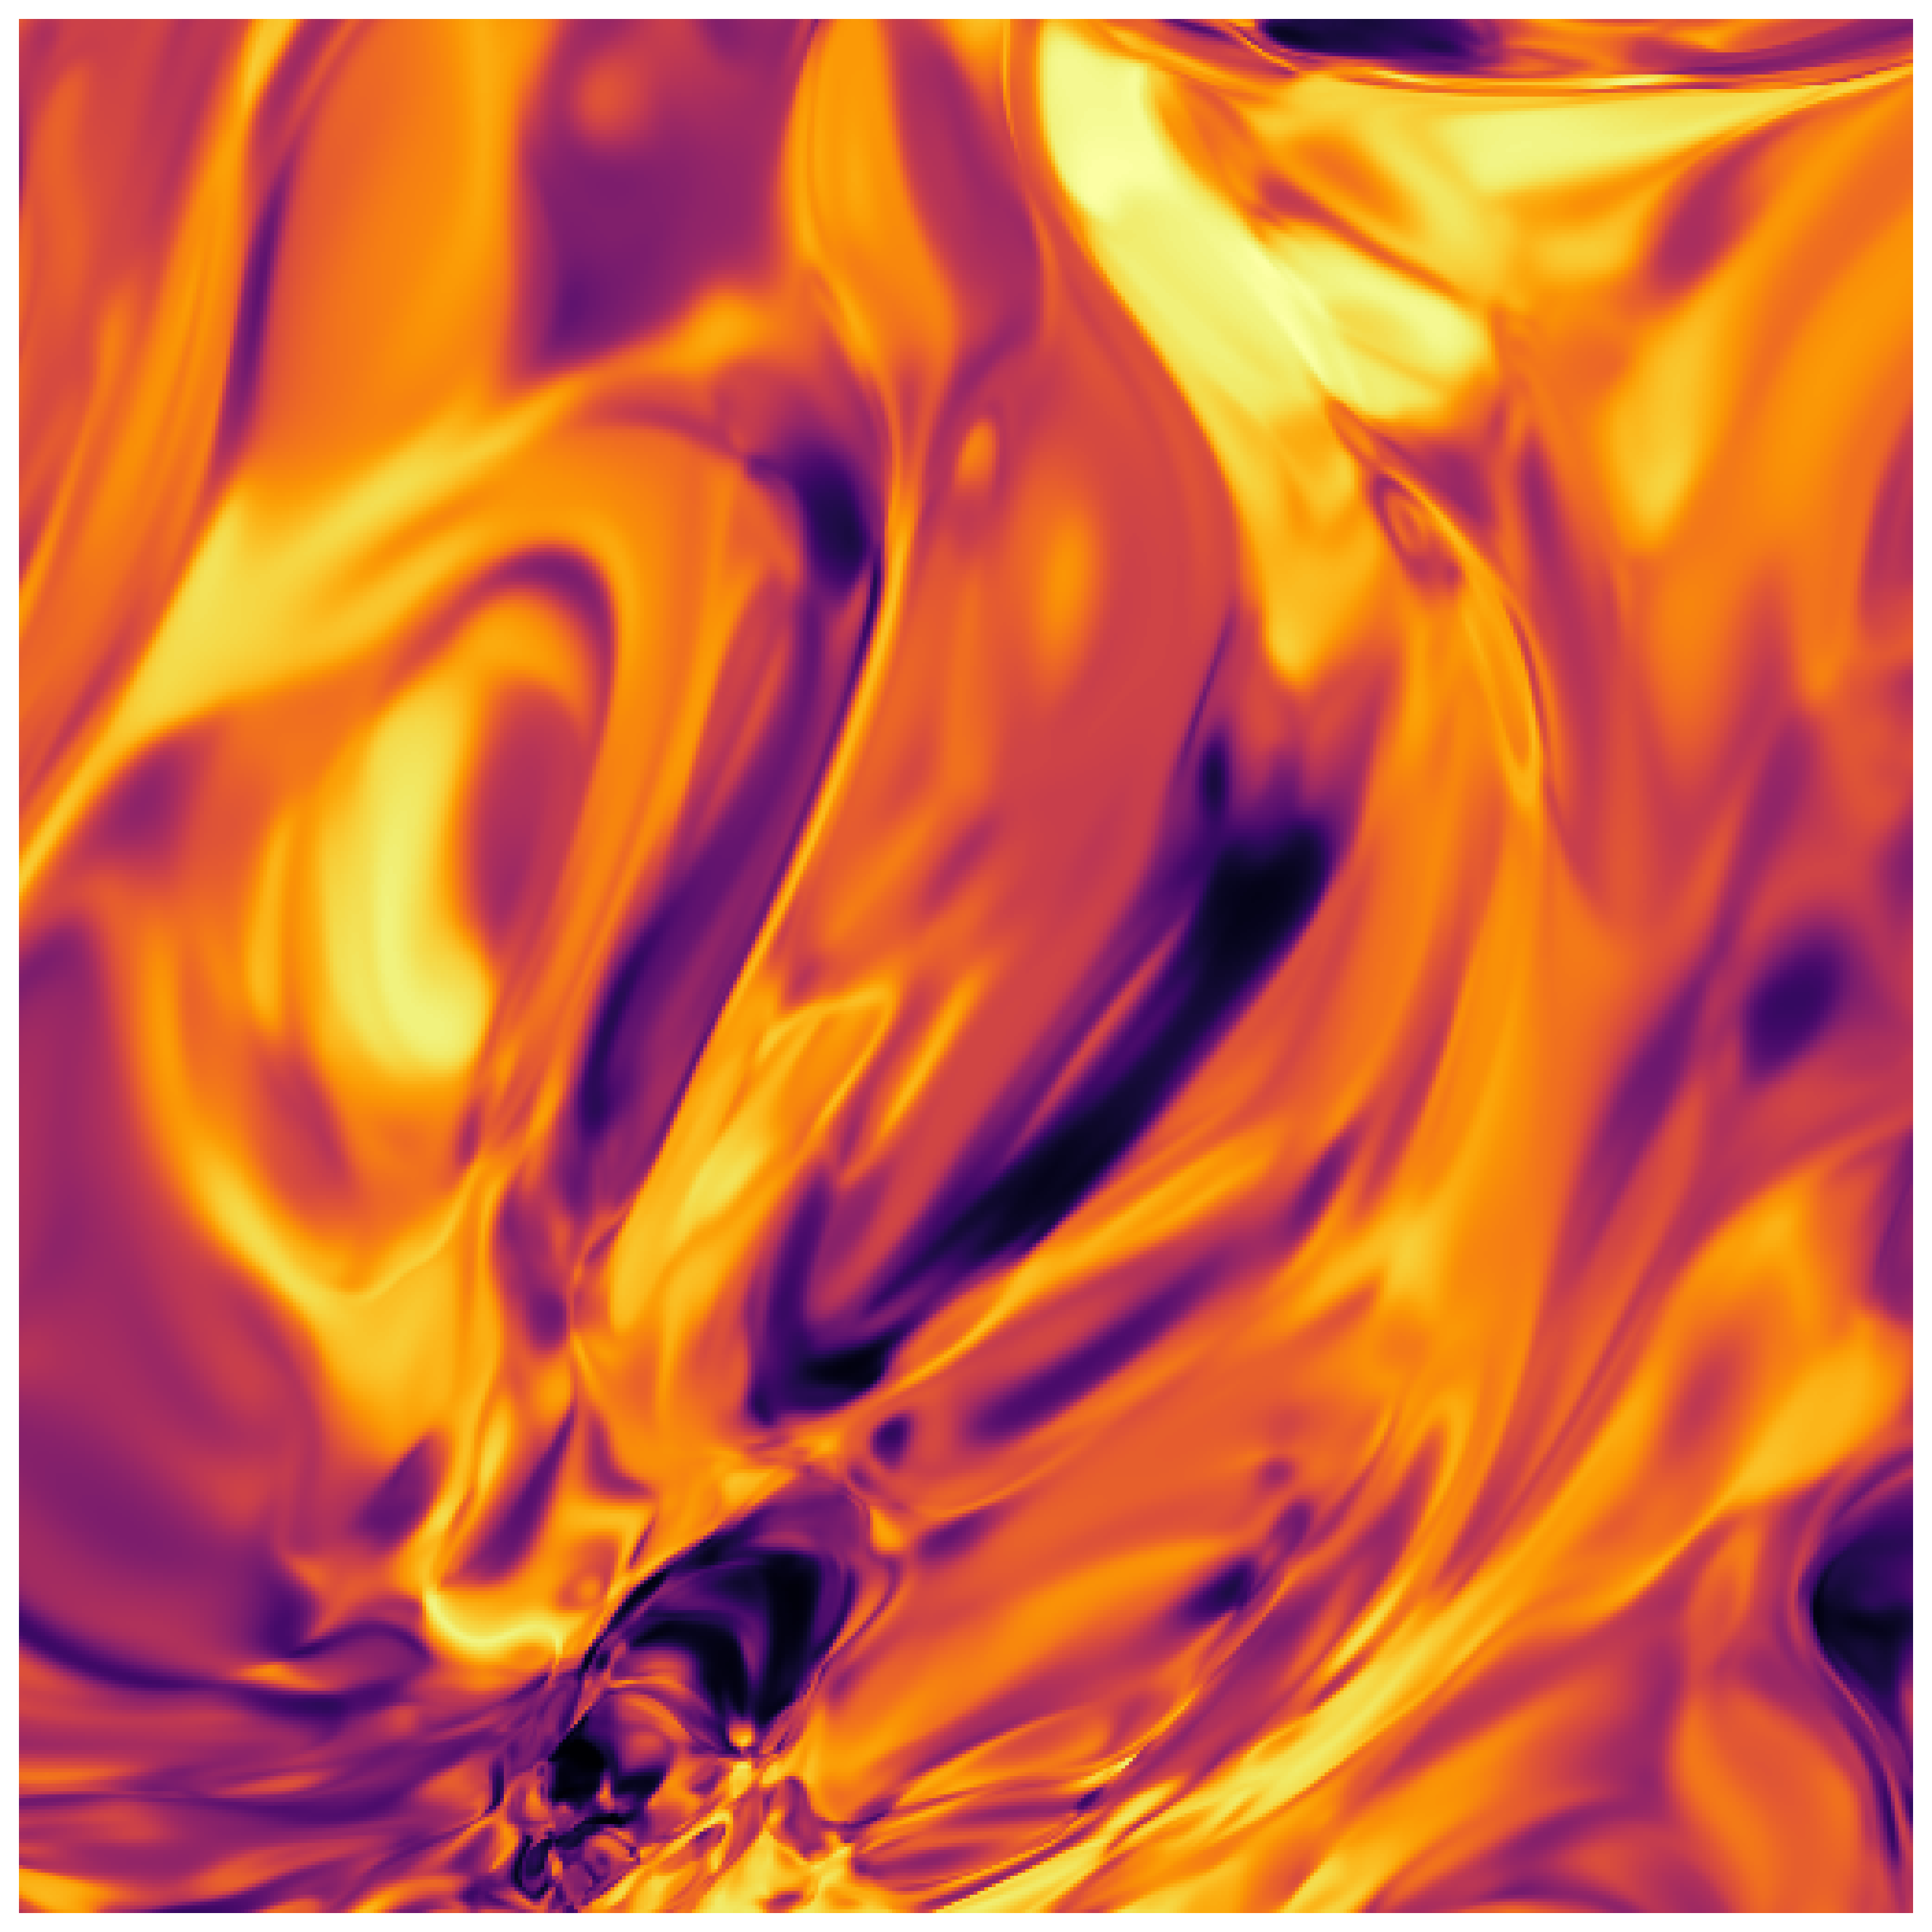

In [ ]:
deep_nn.visualize(grid_size=512, colormap='inferno')

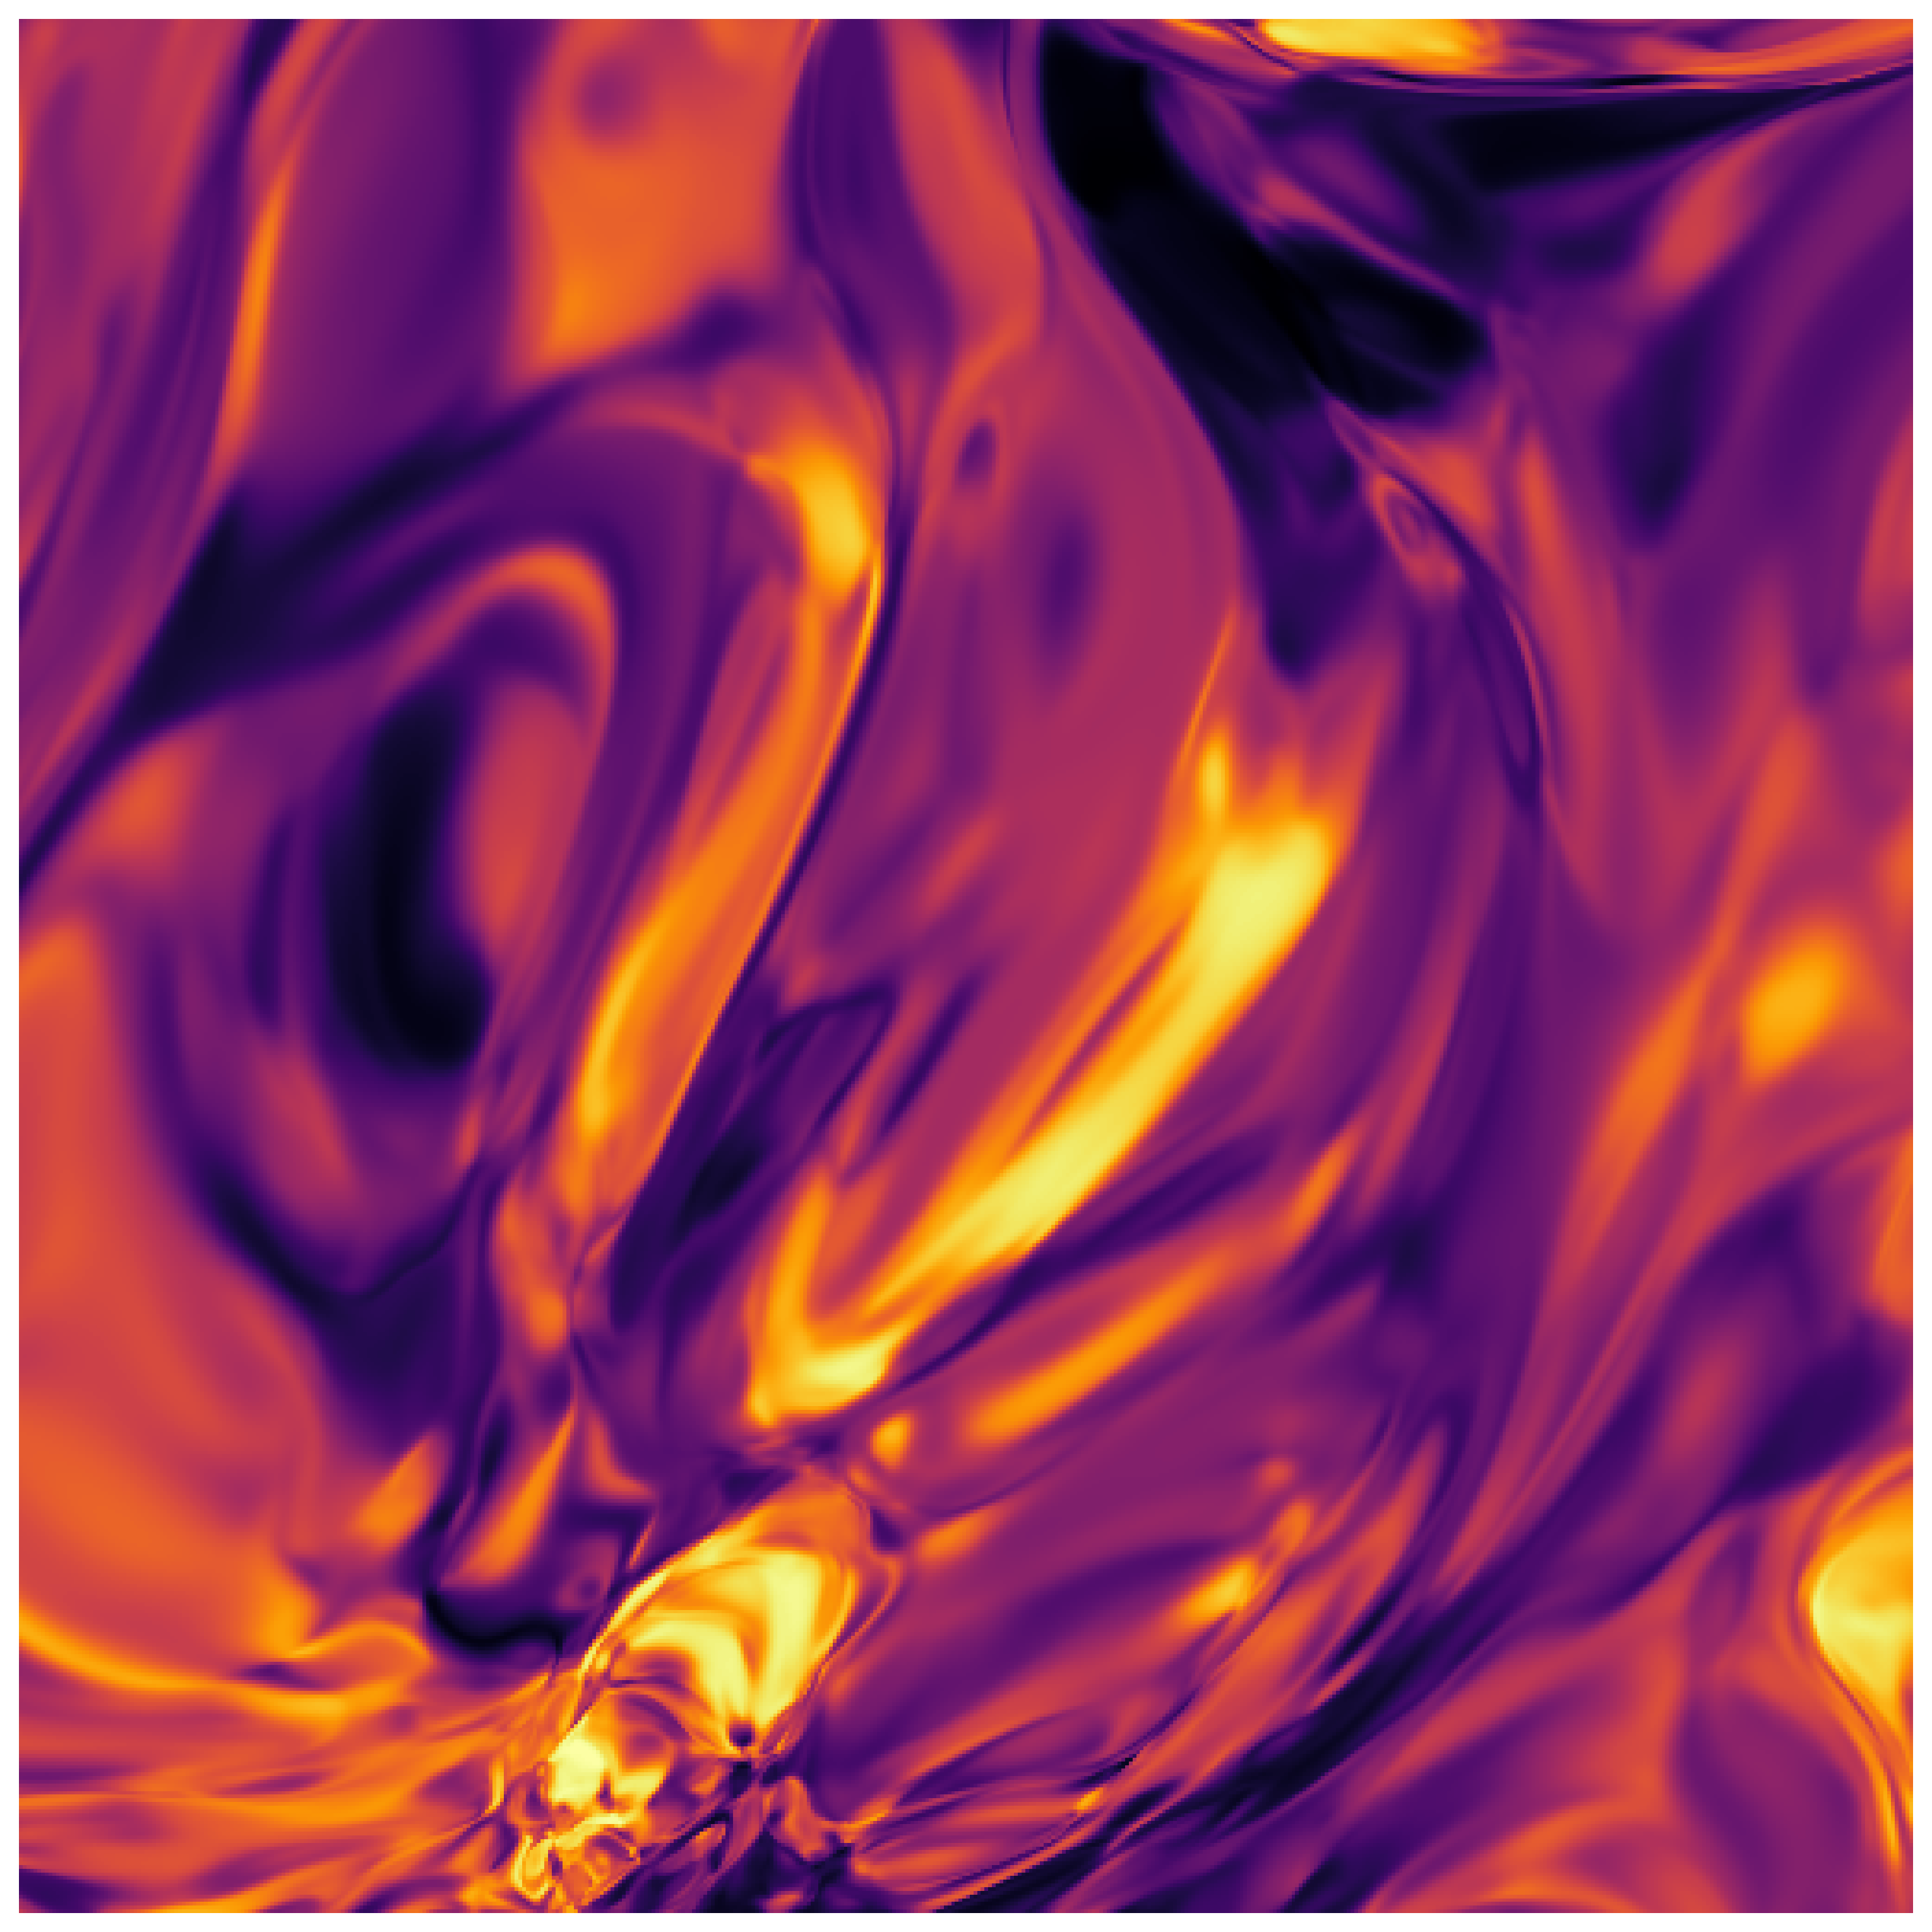

In [ ]:
deep_nn.visualize(grid_size=512, colormap='inferno', c_reverse=True)

In [ ]:
deep_nn = NeuralNet(n_layers=20, n_neurons=100)

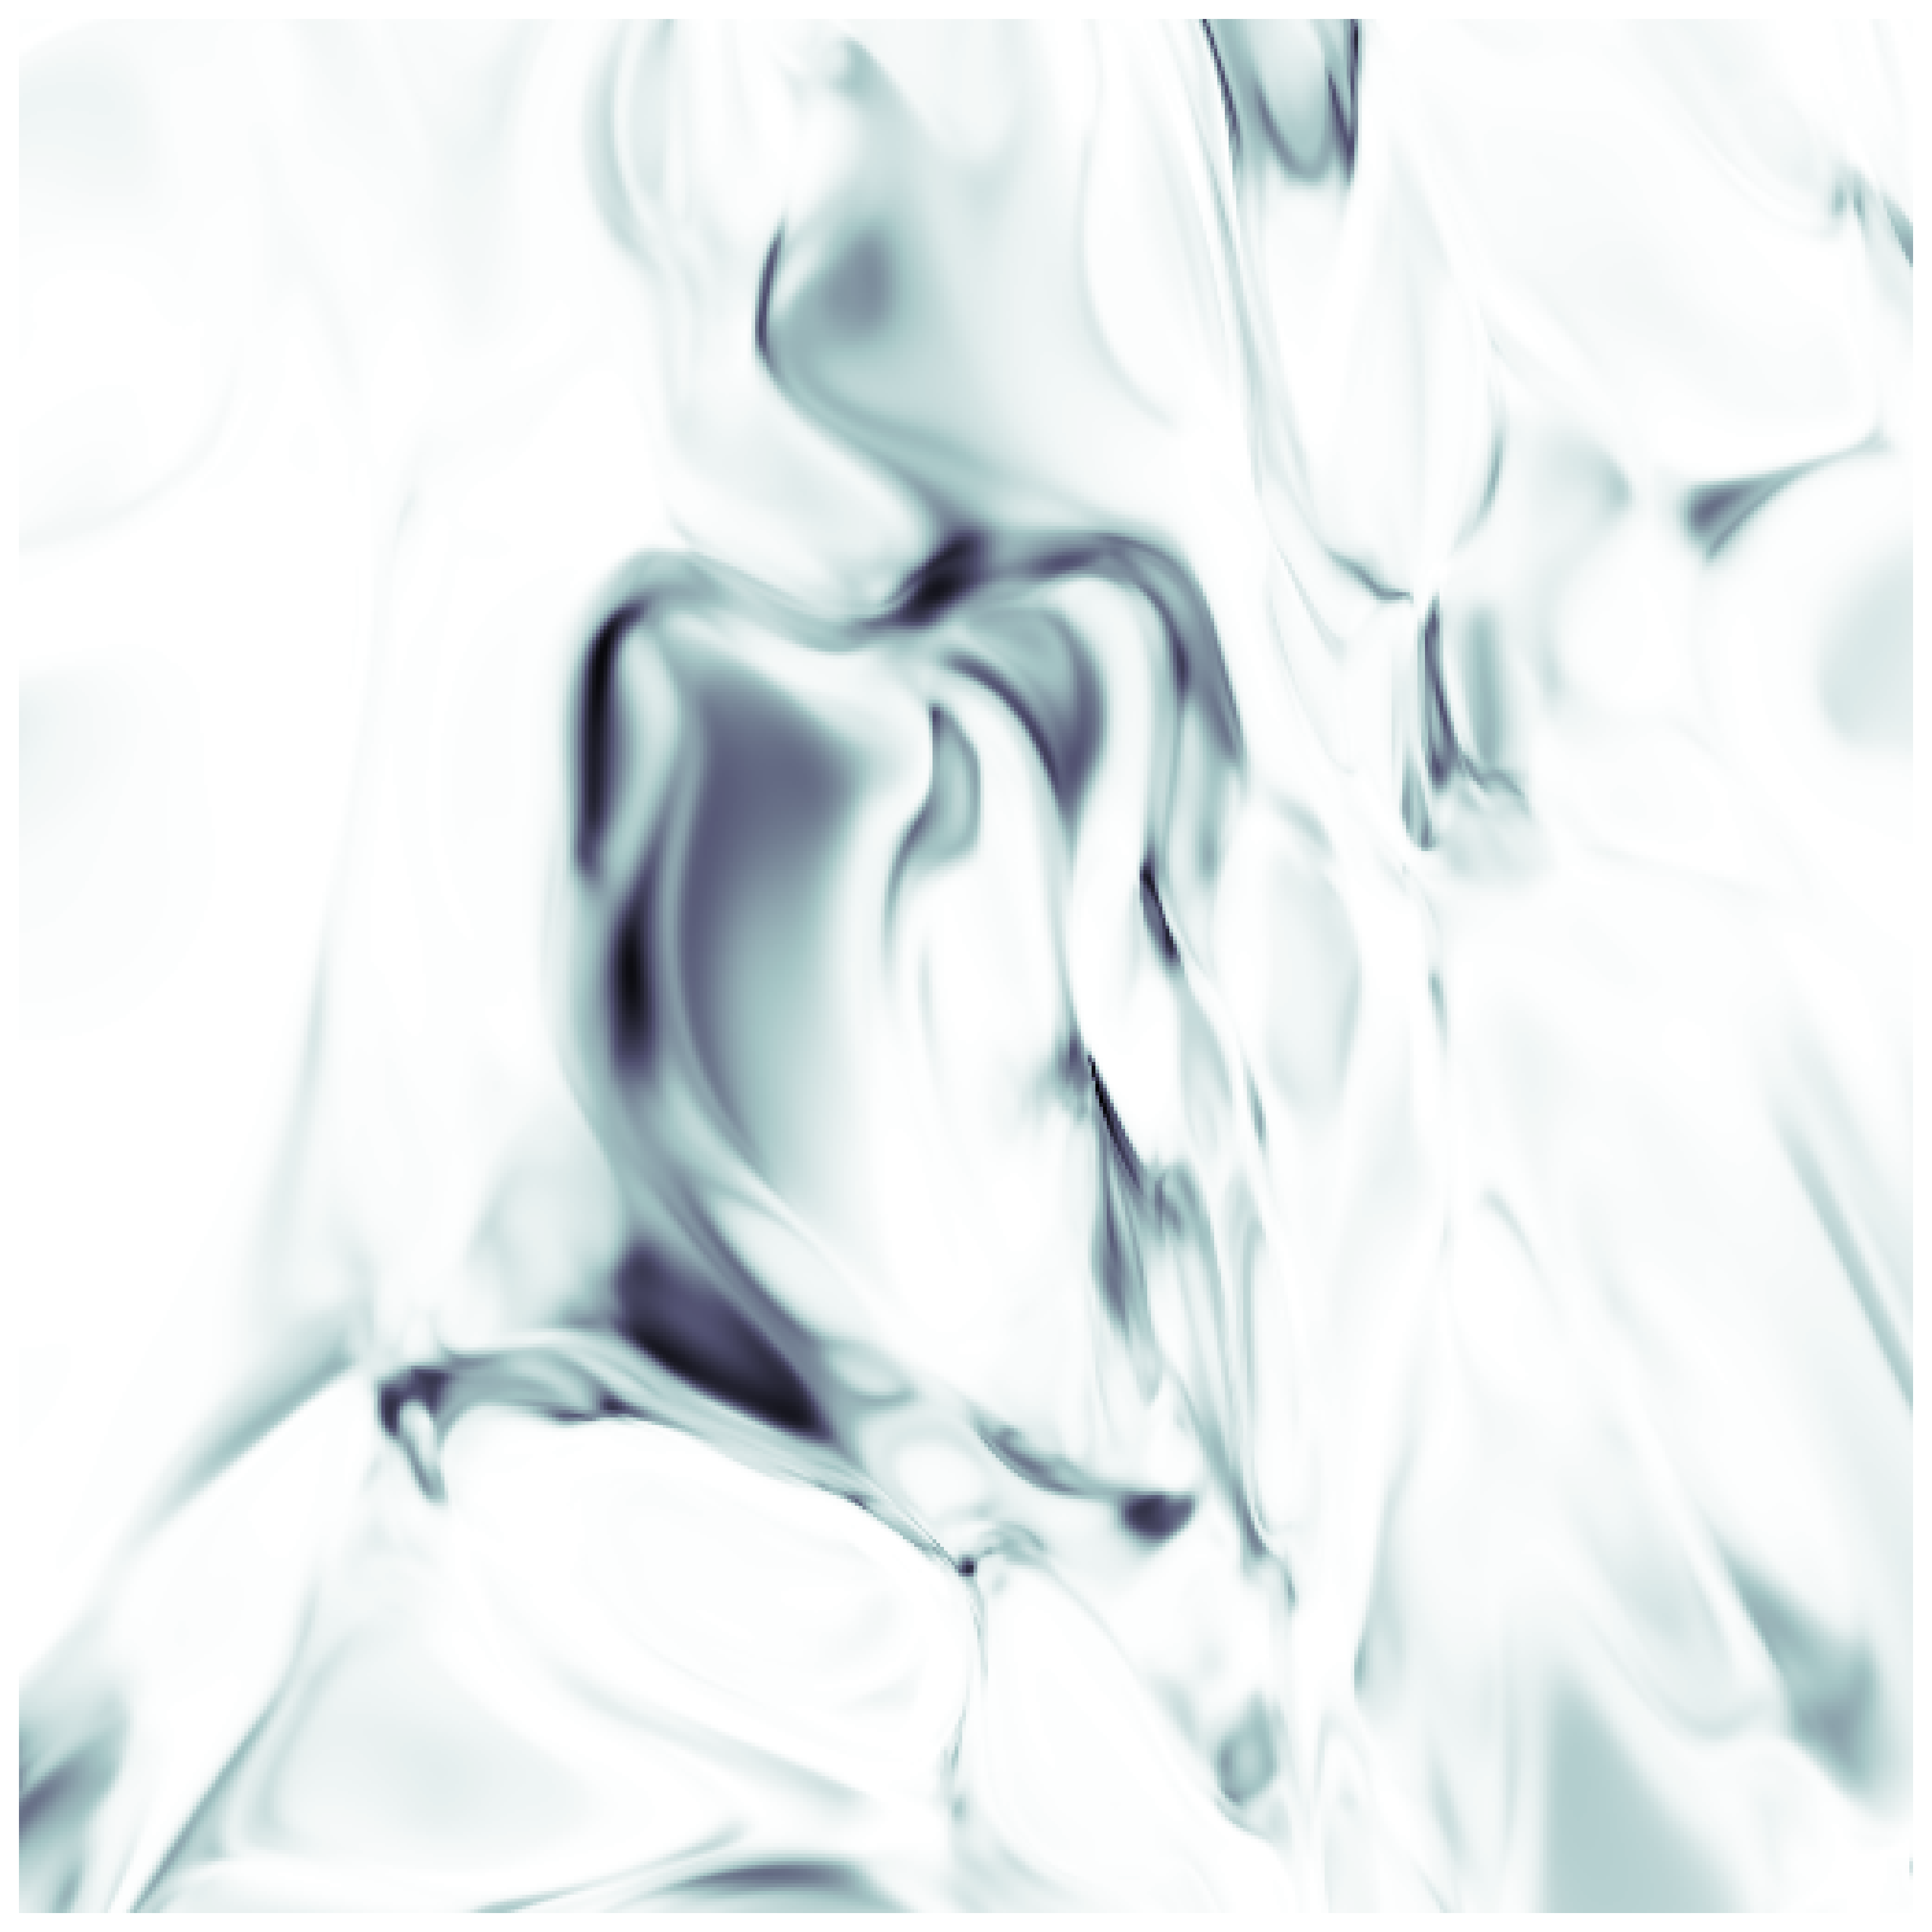

In [ ]:
deep_nn.visualize(grid_size=512, colormap='bone', c_reverse=True)

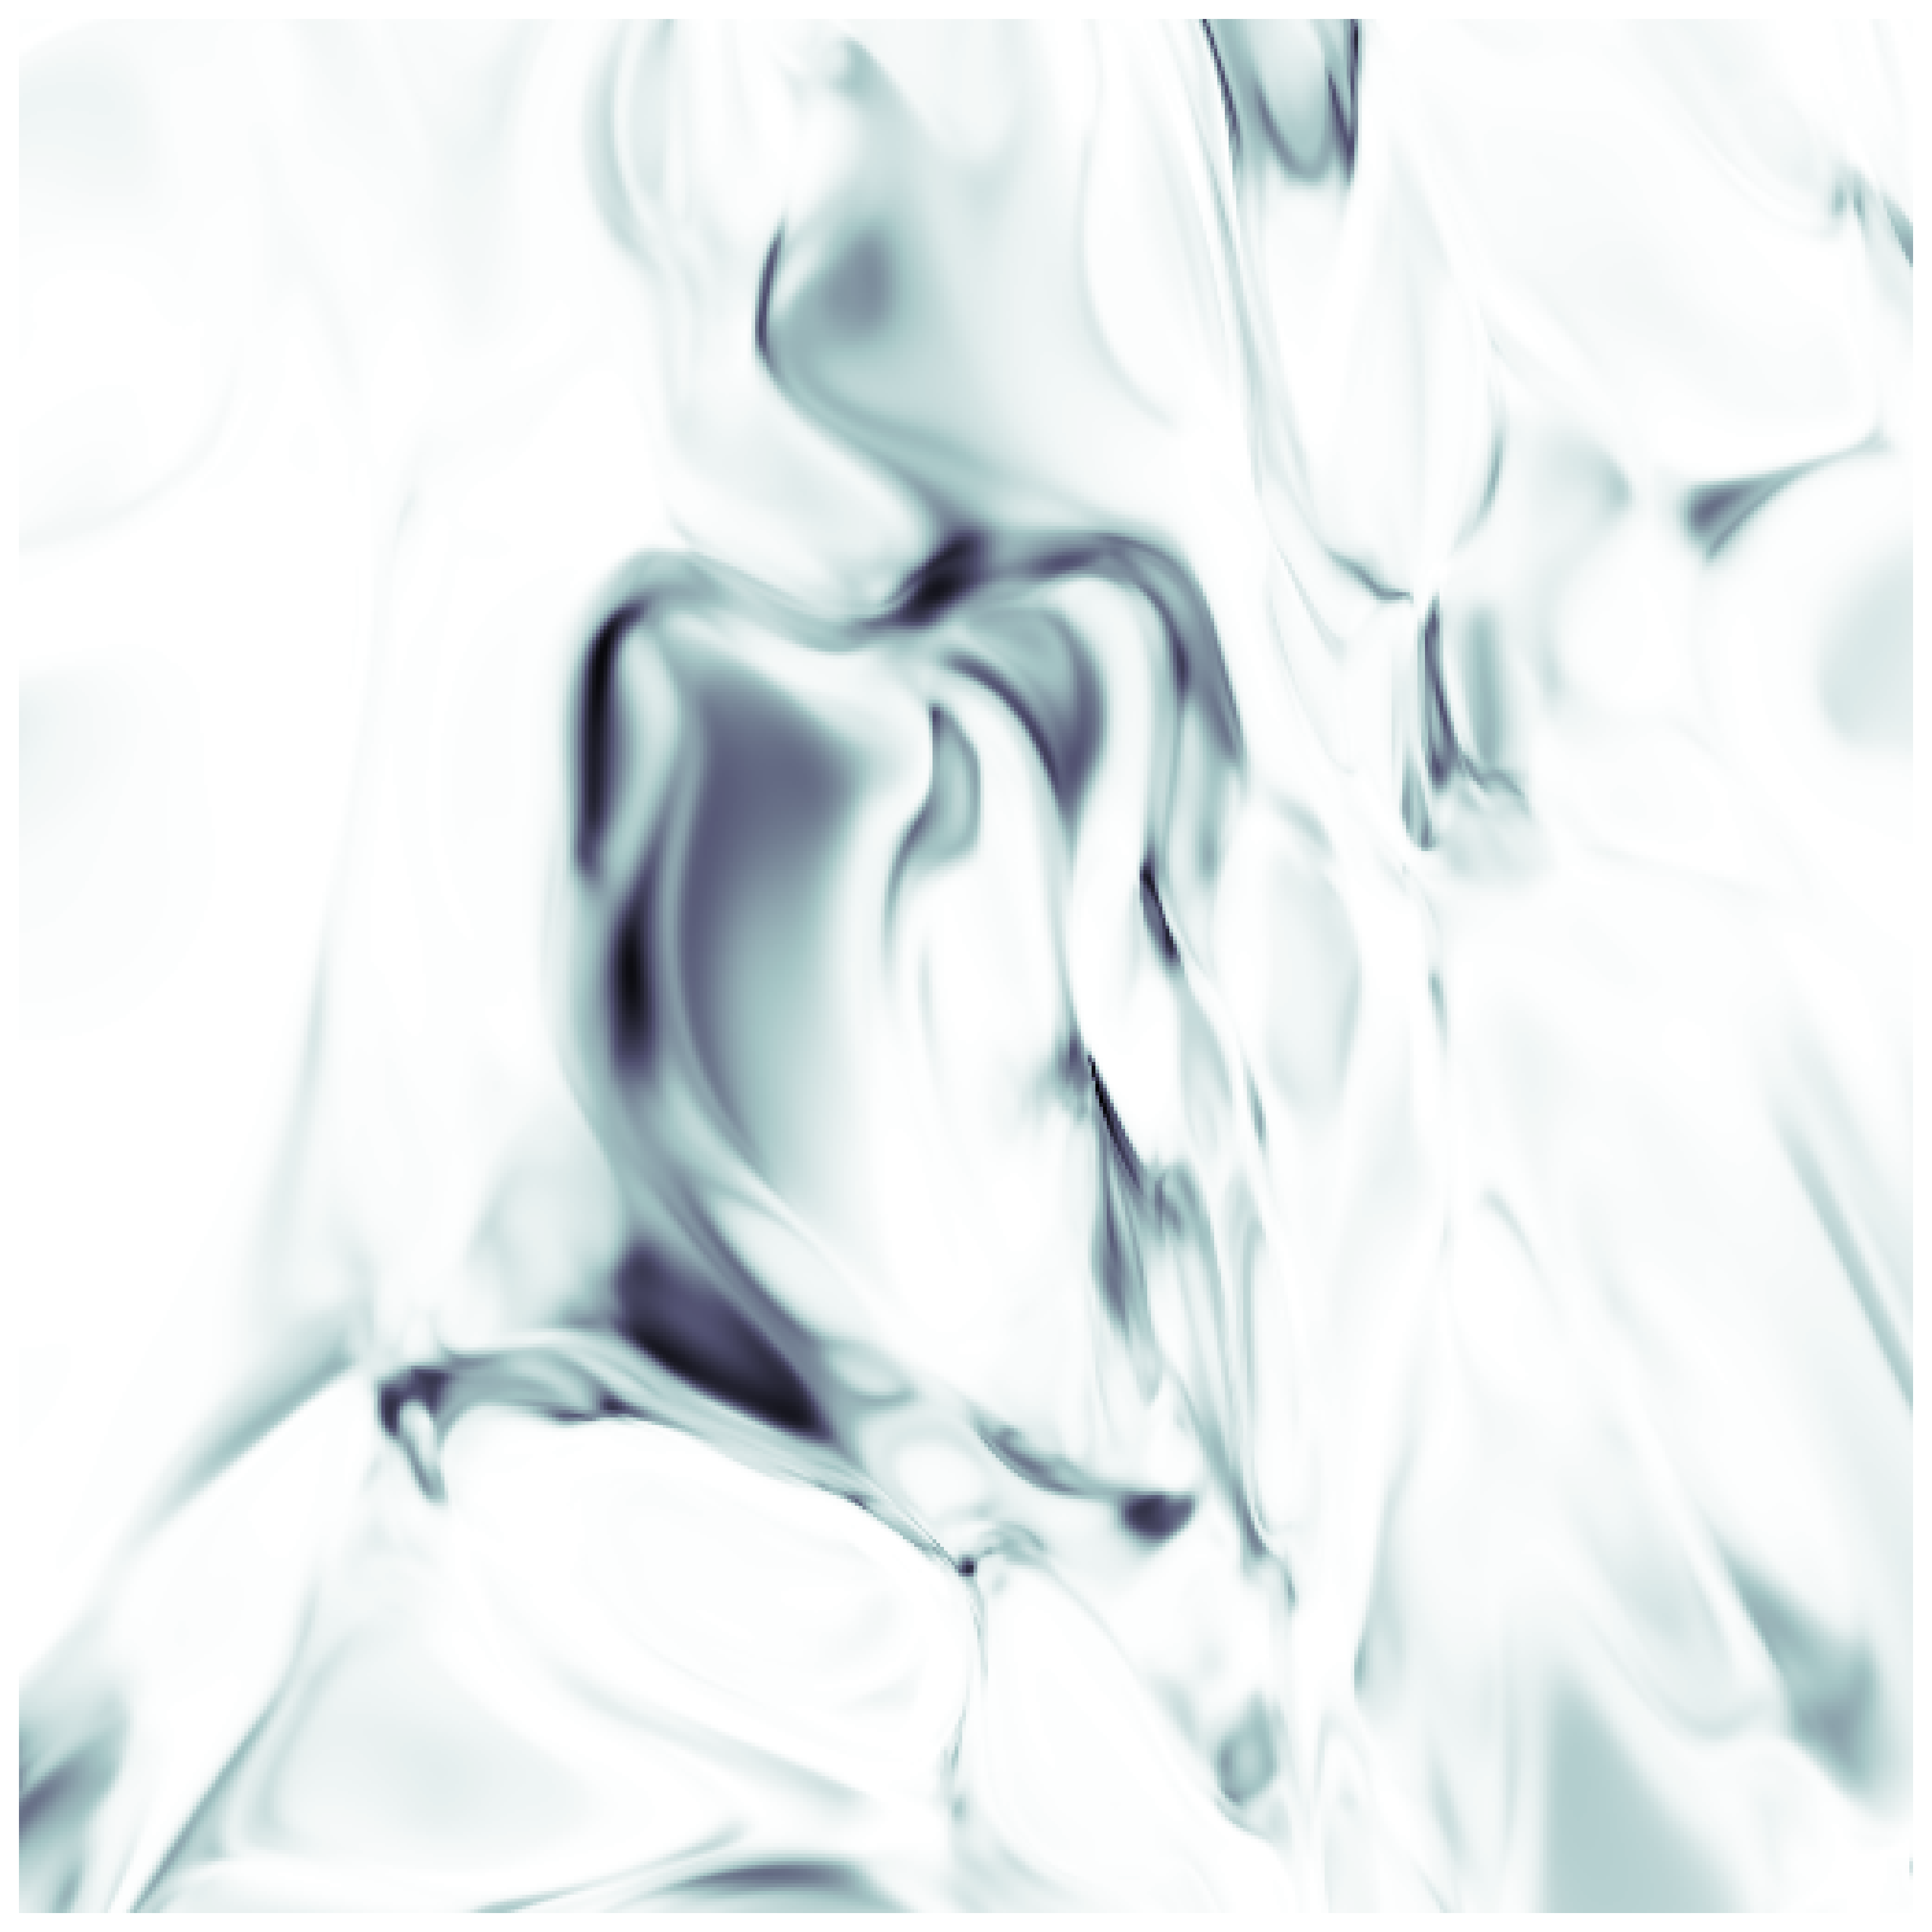

In [ ]:
deep_nn.visualize(grid_size=512, colormap='bone', c_reverse=True)